# Assessment for Advanced Data Science
# *Data Pipelines*

## Radzim Sendyka, Christian Cabrera, Carl Henrik Ek and Neil D. Lawrence

### 19 November 2024

Welcome to the course assessment for the Advanced Data Science unit. In this assessment, you will build two data pipelines and prediction systems.

The maximum total mark for this assessment is 20. That mark is split into two miniprojects below.
- The first miniproject is worth 7 marks.
- The second miniproject is worth 13 marks.

*The check Session for this Assessment is 03 December 2024.*

# Task 1 (7 marks)

This example project builds on your experience from the practicals, using Open Street Maps, and connecting them to real-world datasets.

Your prediction system will be based on data from the 2021 UK Census, and Open Street Maps.

### Build a data pipeline and prediction system.

Structure your system around the [Access-Assess-Address](https://inverseprobability.com/talks/notes/access-assess-address-a-pipeline-for-automated-data-science.html) framework for automated data science.
Use the framework of [Data Readiness Levels](https://inverseprobability.com/publications/data-readiness-levels.html) to track the state of your datasets throughout the process.
Visualise your data and predictions using appropriate charts and graphics.
Remember, your notebook should tell a story.

1.1. Download the data from online sources. In this task you will need:
  - UK Census Data
    - The UK Census data file for and Socio-economic Classification (NS SEC) [here](https://www.ons.gov.uk/datasets/TS062/editions/2021/versions/5) or [here](https://www.nomisweb.co.uk/sources/census_2021_bulk). Use the most detailed area type (Output Areas).
    - One other UK Census data file of your choosing [here](https://www.ons.gov.uk/search?topics=9731,6646,3845,9497,4262,4128,7755,4994,6885,9724,7367&filter=datasets) or [here](https://www.nomisweb.co.uk/sources/census_2021_bulk). Use the most detailed area type available.
    - Geographic coordinates of Census Output Areas [here](https://www.data.gov.uk/dataset/4d4e021d-fe98-4a0e-88e2-3ead84538537/output-areas-december-2021-boundaries-ew-bgc-v2).
  - Spatial data
    - Set up an API connection to Open Street Maps [here](https://osmnx.readthedocs.io/en/stable/). Optionally, to be able to use more data in training, you might want to also download the entire map for England (or more) [here](https://download.openstreetmap.fr/extracts/) or [here](https://wiki.openstreetmap.org/wiki/Planet.osm).

1.2. Structure the data, and upload it to your AWS database.

- Census datasets can be huge and unwieldy to manipulate directly in python frameworks such as pandas. As a result we will host the data in a relational database.

- Using a cloud hosted database (such as MariaDB hosted on the AWS RDS service),  you will construct a database containing tables that contain per-output-area data, latitudes and longitudes of the output areas, and potentially, extracted selected open street maps features from the country-wide data file.

- Make sure you set the correct indices on your data, which will allow your code to run much faster. Hint: create an index on any columns you will be looking up, and joint indices if your lookup involves multiple columns (like coordinates).

You will likely find the following resources helpful.

- Lecture 1, 2 and 3.
- Lab class 1 and 2.


- *Note, this particular dataset could probably be handled directly in pandas, but you are explicitly tasked with using a database. This is a compromise from previous iterations of this course, where students spent quite a lot of time struggling from the size of the data. This is an opportunity for you to demonstrate your skills, as well as prepare for the second part of the assessment where databases might be necessary. Approach that do not use databases where needed will be penalised during marking.*


2.0. Explore the data.

  - To make predictions you will augment your data with information obtained from Open Street Map: an open license source of mapping information. You will need to use the techniques you have learnt in the course to indentify and incorporate useful features for your prediction tasks.
  - Look at the percentage of students (NS SEC code L15) in the individual output areas, and explore how it's related to various types of open street map features in those locations. Use the relationships you found to suggest the features to be used in a system that predicts percentage of students in a given area.
  - Do the same for an additional census variable (e.g., the average age in a given area).

3.0. Make a prediction system.
- Use Open Street Maps to predict Socio-Economic Status - in particular, the percent of full time students, from OSM features. Your function should take as input a coordinate pair (you can assume it will be in England), and return an estimate for the share of students in that area.

- Do the same for the additional census variable you selected in the previous step.

Hints:

  - *Some of the census data sheets are very detailed. You might want to try "boiling them down" to some aggregate value or selecting just the most important columns.*

  - *This assignment is focused on data pipelines, rather than machine learning, so we do not expect any advanced architectures here - a linear model or similar is perfectly fine.*
  
  - *For data exploration, or picking your second dataset, you may find useful the [interactive map](https://www.ons.gov.uk/census/maps/) of the census data.*

### Story.

- Remember the notebook you create should tell a story, any code that is not critical to that story can safely be placed into the associated analysis library and imported for use (structured as given in the Fynesse template). Make sure your decisions are well substanciated and flow nicely throughout the notebook, with clear explanations.

- Explain everything you do. Why is your question important, why you selected the datasets you did, why did you join them how you did, why did you look at the things you looked at.

Make sure in your notebook you discuss the design decisions you made in your pipeline and prediction system. How did you structure your notebook? How did you track data readiness? Which aspects of your system could be improved further?

Make sure you compare how you predict student population and your second chosen property. What differences are there, in the underlying data, process, and results?

Make sure you discuss the reusability of your data pipeline and prediction system. What changes to the underlying data/system is it resilient to, and what isn't it? What work would need to be done to adjust it to answer questions about other statistics, or a different country, instead?

### Fynesse library.

- Alongside your implementation you will provide a short repository overview describing how you have implemented the different parts of the project and where you have placed those parts in your code repository. You will submit your code alongside a version of this notebook that will allow your examiner to understand and reconstruct the thinking behind your analysis. This notebook is structured to help you in creating that description and allow you to understand how we will allocate the marks. You should make use of the Fynesse framework (https://github.com/lawrennd/fynesse_template) for structuring your code.

- One artefact to be included in your submission is a python library structured according to the "Access, Assess, Address" standard for data science solutions. You will submit this library alongside your code. Use the cell below to perform the necessary installation instructions for your library.
You should base your module on the template repository given by the Fynesse template repository. That should make it pip-installable as below.
`%pip install git+https://github.com/lawrennd/fynesse_template.git`. You can either replace fynesse with the name you've given your analysis module or you can leave the name as fynesse if you prefer.

- Remember the notebook you create should tell a story, any code that is not critical to that story can safely be placed into the associated analysis library and imported for use (structured as given in the Fynesse template). Remember to include you fynesse library in your submission.

## Access

In [1]:
# auto-reload our fynesse framework on local change
%load_ext autoreload
%autoreload 2

In [2]:
# configs
%config InlineBackend.figure_format = 'retina'

The following block allows us to use the local version of the fynesse framework to accelerate development and remove redundant and excessive pushing to the remote repository (hosted on GitHub). The up-to-date framework will be available there at the submission of the assessment.

Additionally, this notebook uses a conda environment to manage the python packages, and later R packages used by `pymer4` since python GLMM support is limited at present.

In [3]:
# local fynesse framework
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)
%pip install ../

Processing /home/my4ng/Programming/my385_ads_2024
  Preparing metadata (setup.py) ... done
  Created wheel for fynesse: filename=fynesse-0.1.0-py3-none-any.whl size=11881 sha256=15ae6d30f98f2024278a592ec1558f19c24c21b3089f2918a40ad71e3a8f354f
  Stored in directory: /tmp/pip-ephem-wheel-cache-juf5v3br/wheels/41/0a/c5/d63a977af3f921b121649c98c50583c052126254dd0df68cc0
Successfully built fynesse
  Attempting uninstall: fynesse
    Found existing installation: fynesse 0.1.0
    Uninstalling fynesse-0.1.0:
      Successfully uninstalled fynesse-0.1.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
# remote fynesse framework
# %pip install git+https://github.com/my4ng/my385_ads_2024.git

In [5]:
import yaml
import sqlalchemy

import pandas as pd
import numpy as np
import osmnx as ox
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fynesse import access, address, assess

# parallel apply for pandas as explained later
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Here we create an SQLAlchemy engine to be used by both our jupysql magic sql cell command and as argument to access functions. The `data_dir_path` is the default location where we keep all the downloaded datasets for cleaner file management. We use the credentials to secrets private and separate from the notebook.

In [6]:
# setup sql engine and connection
%load_ext sql
%config SqlMagic.displaycon = False

with open("credentials.yaml") as file:
  credentials = yaml.safe_load(file)
username = credentials["username"]
password = credentials["password"]
url = credentials["url"]
port = credentials["port"]

engine = access.create_engine(username, password, url, port=port)
%sql engine

data_dir_path = "data"

In [7]:
# download NS-SEC data
access.download_2021_census_oa_data("ts062")
# date,geography,geography code,National Statistics Socio-economic Classification (NS-SEC): Total: All usual residents aged 16 years and over,"National Statistics Socio-economic Classification (NS-SEC): L1, L2 and L3 Higher managerial, administrative and professional occupations","National Statistics Socio-economic Classification (NS-SEC): L4, L5 and L6 Lower managerial, administrative and professional occupations",National Statistics Socio-economic Classification (NS-SEC): L7 Intermediate occupations,National Statistics Socio-economic Classification (NS-SEC): L8 and L9 Small employers and own account workers,National Statistics Socio-economic Classification (NS-SEC): L10 and L11 Lower supervisory and technical occupations,National Statistics Socio-economic Classification (NS-SEC): L12 Semi-routine occupations,National Statistics Socio-economic Classification (NS-SEC): L13 Routine occupations,National Statistics Socio-economic Classification (NS-SEC): L14.1 and L14.2 Never worked and long-term unemployed,National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students

We create a temporary table only needed for the later join with the `OA21CD` as the primary key as it is unique and what we are joining on. Even though we only need the percentage of student, we will load all the columns in case we might need them in the future. We will also keep the total column even though it is the sum of the other columns and thus technically redundant, since we will use it repeatedly when calculating the percentage and save some computation.

In [8]:
%%sql
DROP TABLE IF EXISTS `nssec_data`;
-- define table schema 
CREATE TEMPORARY TABLE IF NOT EXISTS `nssec_data` (
    `OA21CD` char(9) COLLATE utf8_bin NOT NULL PRIMARY KEY,
    `total` int(10) unsigned NOT NULL,
    `L1_2_3` int(10) unsigned NOT NULL,
    `L4_5_6` int(10) unsigned NOT NULL,
    `L7` int(10) unsigned NOT NULL,
    `L8_9` int(10) unsigned NOT NULL,
    `L10_11` int(10) unsigned NOT NULL,
    `L12` int(10) unsigned NOT NULL,
    `L13` int(10) unsigned NOT NULL,
    `L14` int(10) unsigned NOT NULL,
    `L15` int(10) unsigned NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin AUTO_INCREMENT=1;

-- upload data
LOAD DATA LOCAL INFILE "{{data_dir_path}}/census2021-ts062-oa.csv" 
INTO TABLE `nssec_data`
FIELDS TERMINATED BY ',' LINES STARTING BY '' TERMINATED BY '\n'
IGNORE 1 LINES
(@ignore,@ignore,OA21CD,total,L1_2_3,L4_5_6,L7,L8_9,L10_11,L12,L13,L14,L15);

SELECT * FROM `nssec_data` LIMIT 5;

188880 rows affected.

5 rows affected.

OA21CD,total,L1_2_3,L4_5_6,L7,L8_9,L10_11,L12,L13,L14,L15
E00000001,159,80,38,13,9,3,5,5,4,2
E00000003,222,96,58,8,26,2,5,2,5,20
E00000005,103,37,28,8,21,0,3,1,1,4
E00000007,140,62,39,5,11,3,3,1,6,10
E00000010,170,34,45,17,27,7,10,14,11,5


In [9]:
# download household size data
access.download_2021_census_oa_data("ts017")
# "date","geography","geography code","Household size: Total: All household spaces; measures: Value","Household size: 0 people in household; measures: Value","Household size: 1 person in household; measures: Value","Household size: 2 people in household; measures: Value","Household size: 3 people in household; measures: Value","Household size: 4 people in household; measures: Value","Household size: 5 people in household; measures: Value","Household size: 6 people in household; measures: Value","Household size: 7 people in household; measures: Value","Household size: 8 or more people in household; measures: Value"

For the additional feature from the census, we choose the household size dataset (TS017), also organised by the output area and upload it similarly as before, with some preprocessed filtering. 

Note: some field is surrounded by double quotation marks, so we have to include `OPTIONALLY ENCLOSED by '"'` here.

In [10]:
%%sql
DROP TABLE IF EXISTS `hh_size_data`;
-- define table schema 
CREATE TEMPORARY TABLE IF NOT EXISTS `hh_size_data` (
    `OA21CD` char(9) COLLATE utf8_bin NOT NULL PRIMARY KEY,
    `S1` int(10) UNSIGNED NOT NULL,
    `S2` int(10) UNSIGNED NOT NULL,
    `S3` int(10) UNSIGNED NOT NULL,
    `S4` int(10) UNSIGNED NOT NULL,
    `S5` int(10) UNSIGNED NOT NULL,
    `S6` int(10) UNSIGNED NOT NULL,
    `S7` int(10) UNSIGNED NOT NULL,
    `S8` int(10) UNSIGNED NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin AUTO_INCREMENT=1;

-- upload data
LOAD DATA LOCAL INFILE "{{data_dir_path}}/census2021-ts017-oa.csv" 
INTO TABLE `hh_size_data`
FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED by '"' LINES STARTING BY '' TERMINATED BY '\n'
IGNORE 1 LINES
(@ignore,@ignore,OA21CD,@ignore,@ignore,S1,S2,S3,S4,S5,S6,S7,S8);

SELECT * FROM `hh_size_data` LIMIT 5;

188880 rows affected.

5 rows affected.

OA21CD,S1,S2,S3,S4,S5,S6,S7,S8
E00000001,34,44,10,6,0,0,0,0
E00000003,27,42,19,17,4,0,0,0
E00000005,26,27,8,2,0,0,0,0
E00000007,38,44,2,2,1,0,0,0
E00000010,96,19,4,3,3,0,0,0


In [11]:
access.download_oa_geo()
# FID,OA21CD,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,Shape__Area,Shape__Length,GlobalID

Similarly for the output area geographic data, we use the `OA21CD` for the primary key and load the latitude and longitude:

In [11]:
%%sql
DROP TABLE IF EXISTS `oa_geo_data`;
-- define table schema 
CREATE TEMPORARY TABLE IF NOT EXISTS `oa_geo_data` (
    `OA21CD` char(9) COLLATE utf8_bin NOT NULL PRIMARY KEY,
    `latitude` decimal(11,8) NOT NULL,
    `longitude` decimal(10,8) NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin AUTO_INCREMENT=1;

-- upload data
LOAD DATA LOCAL INFILE "{{data_dir_path}}/oa_geo.csv" 
INTO TABLE `oa_geo_data`
FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED by '"' LINES STARTING BY '' TERMINATED BY '\n'
IGNORE 1 LINES
(@ignore,OA21CD,@ignore,@ignore,@ignore,@ignore,@ignore,latitude,longitude,@ignore,@ignore,@ignore);

SELECT * FROM `oa_geo_data` LIMIT 5;

188880 rows affected.

5 rows affected.

OA21CD,latitude,longitude
E00000001,51.52022000,-0.09523000
E00000003,51.51983000,-0.09638000
E00000005,51.51896000,-0.09649000
E00000007,51.51674000,-0.09771000
E00000010,51.52250000,-0.09741000


We join the two tables from the census with the coordinates using the output area code. We also filter for ones starting with `E` for England since that's the area we are concerned with. We also create a multi-column index on the coordinates for faster access.

In [13]:
%%sql
DROP TABLE IF EXISTS `nssec_geo_data`;
-- define table schema 
CREATE TABLE `nssec_geo_data`
SELECT *
FROM `nssec_data`
INNER JOIN `oa_geo_data` USING (OA21CD)
WHERE `OA21CD` LIKE 'E%';

CREATE INDEX idx_coords ON `nssec_geo_data` (latitude,longitude);

SELECT * FROM `nssec_geo_data` LIMIT 5;

178605 rows affected.

5 rows affected.

OA21CD,total,L1_2_3,L4_5_6,L7,L8_9,L10_11,L12,L13,L14,L15,latitude,longitude
E00000001,159,80,38,13,9,3,5,5,4,2,51.52022000,-0.09523000
E00000003,222,96,58,8,26,2,5,2,5,20,51.51983000,-0.09638000
E00000005,103,37,28,8,21,0,3,1,1,4,51.51896000,-0.09649000
E00000007,140,62,39,5,11,3,3,1,6,10,51.51674000,-0.09771000
E00000010,170,34,45,17,27,7,10,14,11,5,51.52250000,-0.09741000


In [14]:
%%sql
DROP TABLE IF EXISTS `hh_size_geo_data`;
-- define table schema 
CREATE TABLE `hh_size_geo_data`
SELECT * 
FROM `hh_size_data`
INNER JOIN `oa_geo_data` USING (OA21CD)
WHERE `OA21CD` LIKE 'E%';

CREATE INDEX idx_coords ON `hh_size_geo_data` (latitude,longitude);

SELECT * FROM `hh_size_geo_data` LIMIT 5;

178605 rows affected.

5 rows affected.

OA21CD,S1,S2,S3,S4,S5,S6,S7,S8,latitude,longitude
E00000001,34,44,10,6,0,0,0,0,51.52022000,-0.09523000
E00000003,27,42,19,17,4,0,0,0,51.51983000,-0.09638000
E00000005,26,27,8,2,0,0,0,0,51.51896000,-0.09649000
E00000007,38,44,2,2,1,0,0,0,51.51674000,-0.09771000
E00000010,96,19,4,3,3,0,0,0,51.52250000,-0.09741000


In [15]:
%sql SHOW TABLES

5 rows affected.

Tables_in_ads_2024
hh_size_geo_data
nssec_geo_data
postcode_data
pp_data
prices_coordinates_data


For the OpenStreetMap (OSM) dataset, let's compare the performance between a downloaded pbf file for the whole of England and the OSM API, by querying the features near Cambridge:

In [16]:
# Cambridge example
latitude = 52.1951
longitude = 0.1313

In [17]:
# access.download_eng_pbf()
# gdf = access.features_from_point_local(latitude, longitude, tags={'building': True})
# ~8.5 seconds

In [18]:
gdf = ox.features_from_point((latitude, longitude), tags={'building': True}, dist=500)
# < 1 second

The _pyrosm_ package can directly process the pbf openstreetmap file. However, it loads the entire English dataset into memory, and thus causes an OOM error even on an 8-core/32GB machine. Instead, the _osmium-extract_ tool is used to clip the bounding box at the cost of additional external dependency. But even with parallelism, it still takes 10s for a single 1km bounding box filtering and OSM feature geo-dataframe generation compared to less than 1 second if fetched using the OSM API. We may have to perform some significant optimisation to use the dataset locally, and therefore let's use the API **for now** and reuse the `pois_near_coordinates_df` and `count_pois_near_coordinates` functions in access from practical 2. They are implemented as a dictionary of features. For example:

```py
features = {
  "Higher Education": [("amenity", ["university", "research_institute"])],
  "Historic": [("historic", True)],
  "Sport/Park": [("leisure", ["park", "dog_park"]), ("sport", True)],
  "Public Transport": [("public_transport", ["platform"])],
  "Shop": [("shop", True)],
  "High/Med Res.": [("building", ["apartments", "terrace"])],
}
```

This is a more powerful representation than a naive dictionary of features by adding a readable name as well as aggregating similar features (e.g. leisure and sport) into a single count. It prevents double-counting another feature by ensuring the tag value matches as well.

### Access summary

We first use the access part of the fynesse framework to download the census dataset from the official census stats service provided by the UK government. The datasets are available under the Open Government Licence (OGL) such that "anyone wishing to use or re-use ONS material, whether commercially or privately, may do so freely without a specific application for a licence, subject to the conditions of the OGL and the Framework". The datasets also ensure confidentiality and protection of personal dta by adjusting information that may allow one to identify a particular individual.

The access function `download_2021_census_oa_data` allows reusability to download different topic summaries and extract the output area csv files using `zipfile`. The output area geographic data is also available from ONS geography under the OGL. The resulting datasets are then filtered, uploaded to the cloud relational database, filtered further, joined using the OA code and finally multi-indexed on the coordinates for faster access in the following stages.

The OpenStreetMap data is licensed under the Open Data Commons Open Database License (ODbL), where "You are free to copy, distribute, transmit and adapt our data, as long as you credit OpenStreetMap and its contributors. If you alter or build upon our data, you may distribute the result only under the same licence. The full legal code explains your rights and responsibilities." After trialling with local OSM files, we also decide that it is more efficient to train the model using the API through `osmnx`, especially if the model is trained under a resource-constrained environment.

## Assess

We shall firstly examine the distribution of the percentage of students:

In [67]:
pc_student_df = access.get_pc_student_df(engine)
pc_student_df

,pc_student,latitude,longitude
OA21CD,,,
E00000001,0.0126,51.52022,-0.09523
E00000003,0.0901,51.51983,-0.09638
E00000005,0.0388,51.51896,-0.09649
E00000007,0.0714,51.51674,-0.09771
E00000010,0.0294,51.52250,-0.09741
...,...,...,...
E00190590,0.0198,51.20678,-1.43728
E00190591,0.0367,50.88435,-1.32612
E00190592,0.0353,51.22759,-1.47149


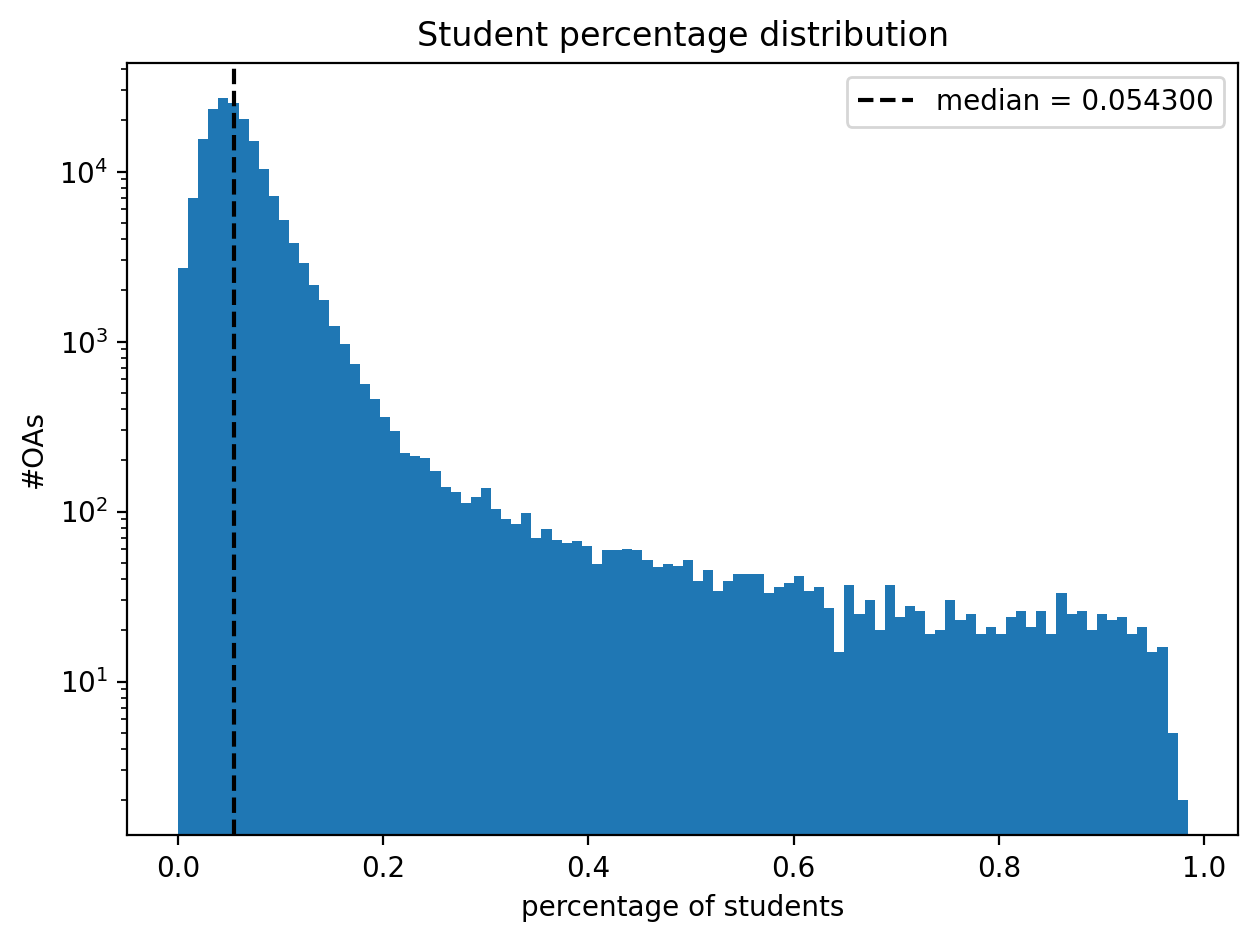

In [68]:
assess.plot_dist(pc_student_df, 'pc_student', 'percentage of students', '#OAs', 'Student percentage distribution')

We can observe that the majority of output areas have a relatively low percentage of students, with median only 5%. Since it is heavily right-skewed, a logarithmic transformation to the target might be useful to achieve a more normal distribution. We can confirm this below:

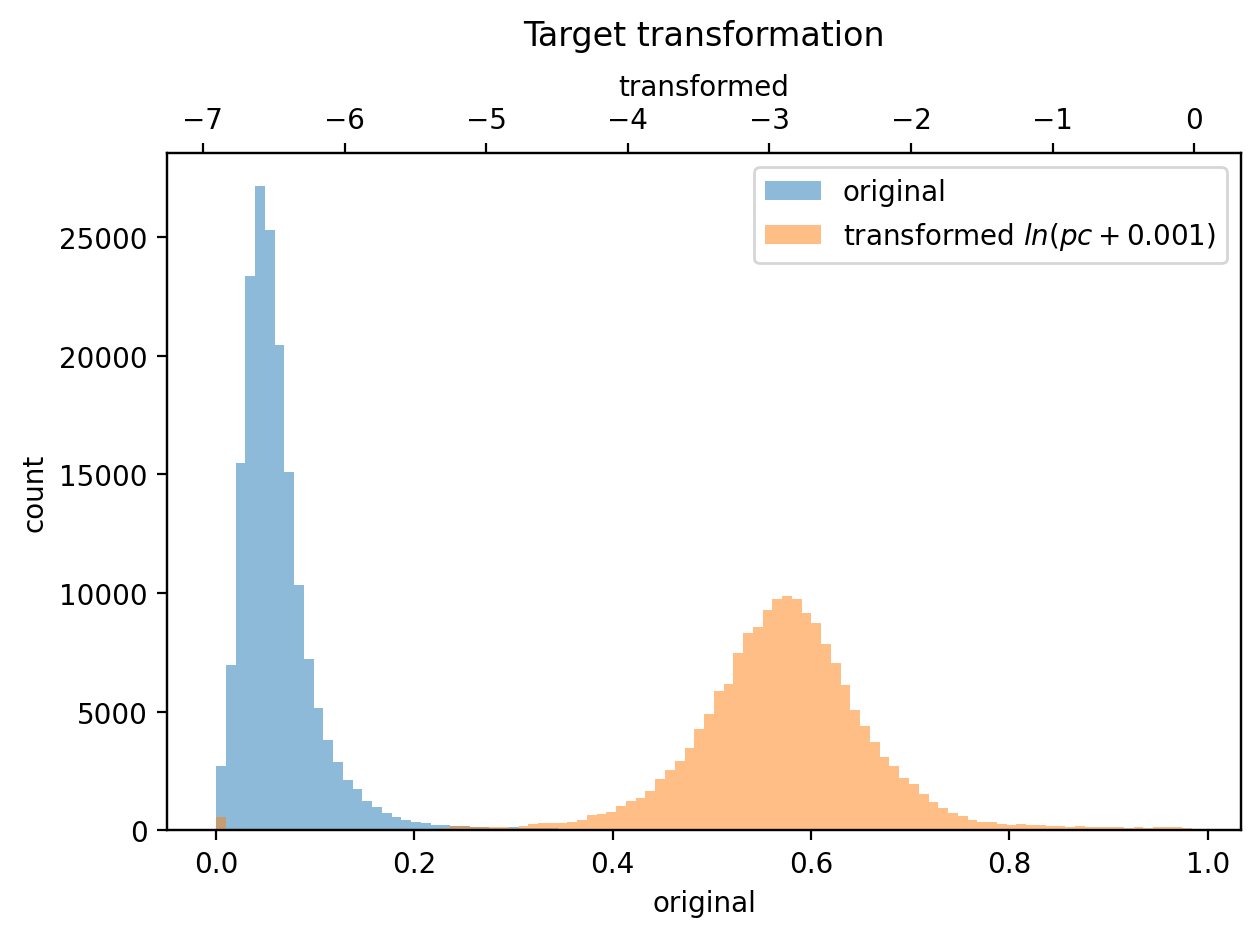

In [19]:
fig, ax = plt.subplots()

original = ax.hist(pc_student, bins=100, alpha=0.5)[2]

ax.set_ylabel('count')
ax.set_xlabel('original')

ax = ax.twiny()
trans = ax.hist(np.log(pc_student + 0.001), bins=100, alpha=0.5, color='C1')[2]

ax.set_xlabel('transformed')
ax.legend([original, trans], 
          ['original', 'transformed $ln(pc + 0.001)$'])
ax.set_title('Target transformation', pad=10)

plt.tight_layout()

We added a small offset to avoid taking the logarithm of exactly 0.

Let's select a subset of the output areas and investigate a few OSM features around the areas:

NOTE: We need to pay extra attention to filter schools that contain sixth form (over age 16), i.e. an isced level of 3. As such, we need to modify the count function from access to adjust for this additional filtering.

We can check the stats for schools for UK, including the tag key/value count and distribution:
https://taginfo.openstreetmap.org.uk/keys/isced:level#values

In [8]:
features = {
  "Education": [("amenity", [("school", "isced:level", ["2;3", "0;1;2;3", "1;2;3", "3", "2-3"]), "college", "university"])],
  "Shopping": [("shop", True)],
  "Office": [("office", True)],
  "Public Transport": [("highway", ["bus_stop"])],
  "Cycleway": [("cycleway", True)],
}

Unfortunately, the queries to the main overpass API become slow for large number of features and bounding boxes. For reference, the request for 1000 OAs with a bbox size of 2km and five features takes over 20 minutes. In addition, such large number of queries may degrade the performance of the servers for other users, as the [wiki](https://wiki.openstreetmap.org/wiki/Overpass_API) states, "You can safely assume that you don't disturb other users when you do less than 10,000 queries per day and download less than 1 GB data per day".

Therefore, we will set up an [overpass-API](https://github.com/wiktorn/Overpass-API) podman container that downloads the England OSM file once and serve the API request locally with better throughput and without rate limits. In addition, we will modify the access function to use `pandarallel` for multithreading to perform concurrent queries. The same uncached query now takes less than 3 minutes. This will become significant later on when we train the models on much larger samples.

In [ ]:
podman run \
  -e OVERPASS_MODE=init \
  -e OVERPASS_PLANET_URL=http://download.geofabrik.de/europe/united-kingdom/england-latest.osm.bz2 \
  -e OVERPASS_RULES_LOAD=10 \
  -v <database path>:/db:Z \
  -p 12345:80 \
  -i -t \
  --name overpass wiktorn/overpass-api

In [84]:
ox.settings.overpass_url = "http://localhost:12345/api"
ox.settings.overpass_rate_limit = False

In [10]:
subset_df = access.get_subset_df(pc_student_df, 'pc_student', 100)
pois_df = access.get_pois_df(subset_df, features, 5)
pois_df

,Education,Shopping,Office,Public Transport,Cycleway
OA21CD,,,,,
E00133585,2,79,14,68,19
E00138834,0,4,0,5,0
E00024079,37,2786,601,493,601
E00095700,0,2,0,19,0
E00080580,1,52,4,140,12
...,...,...,...,...,...
E00144767,0,1,0,18,0
E00176310,70,3277,883,742,1403
E00095567,0,0,0,4,3


We can see that the counts vary wildly between features, which suggest a preprocessing scaler might be useful in the address stage. 

Let's examine the correlation matrix in case the features are heavily correlated which is undesirable since it may make the predictions unstable and the model uninterpretable:

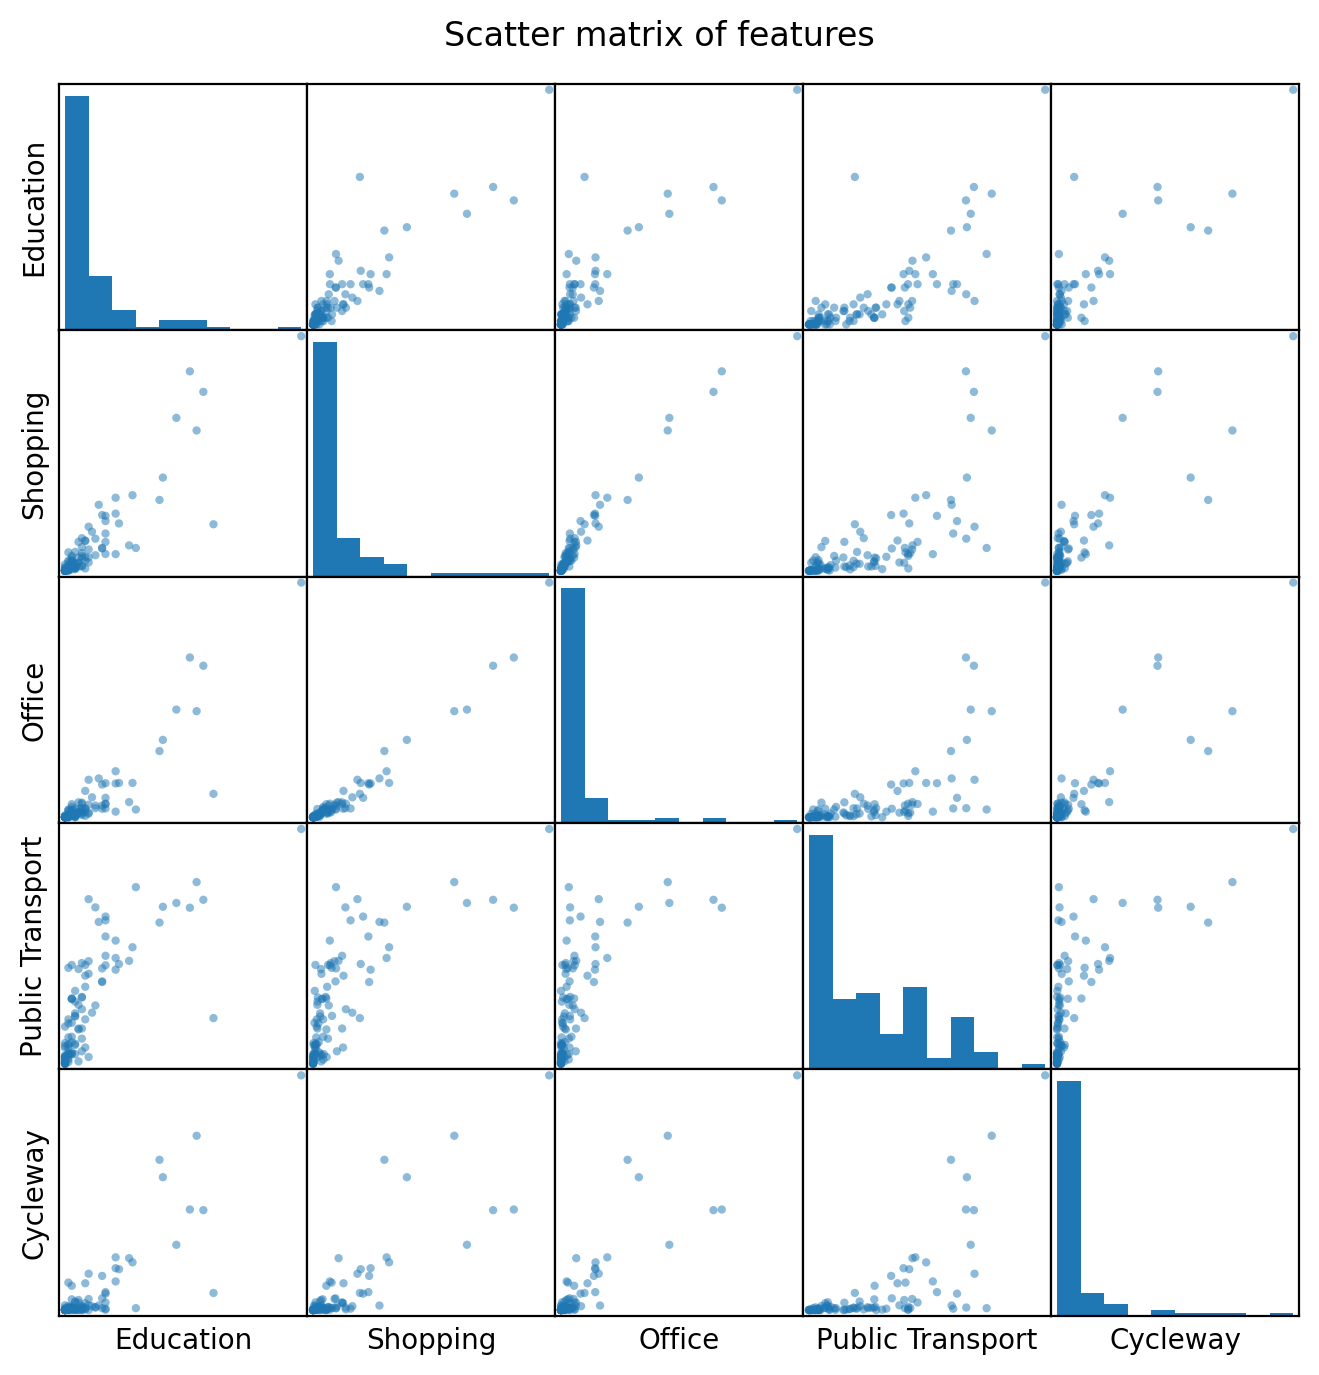

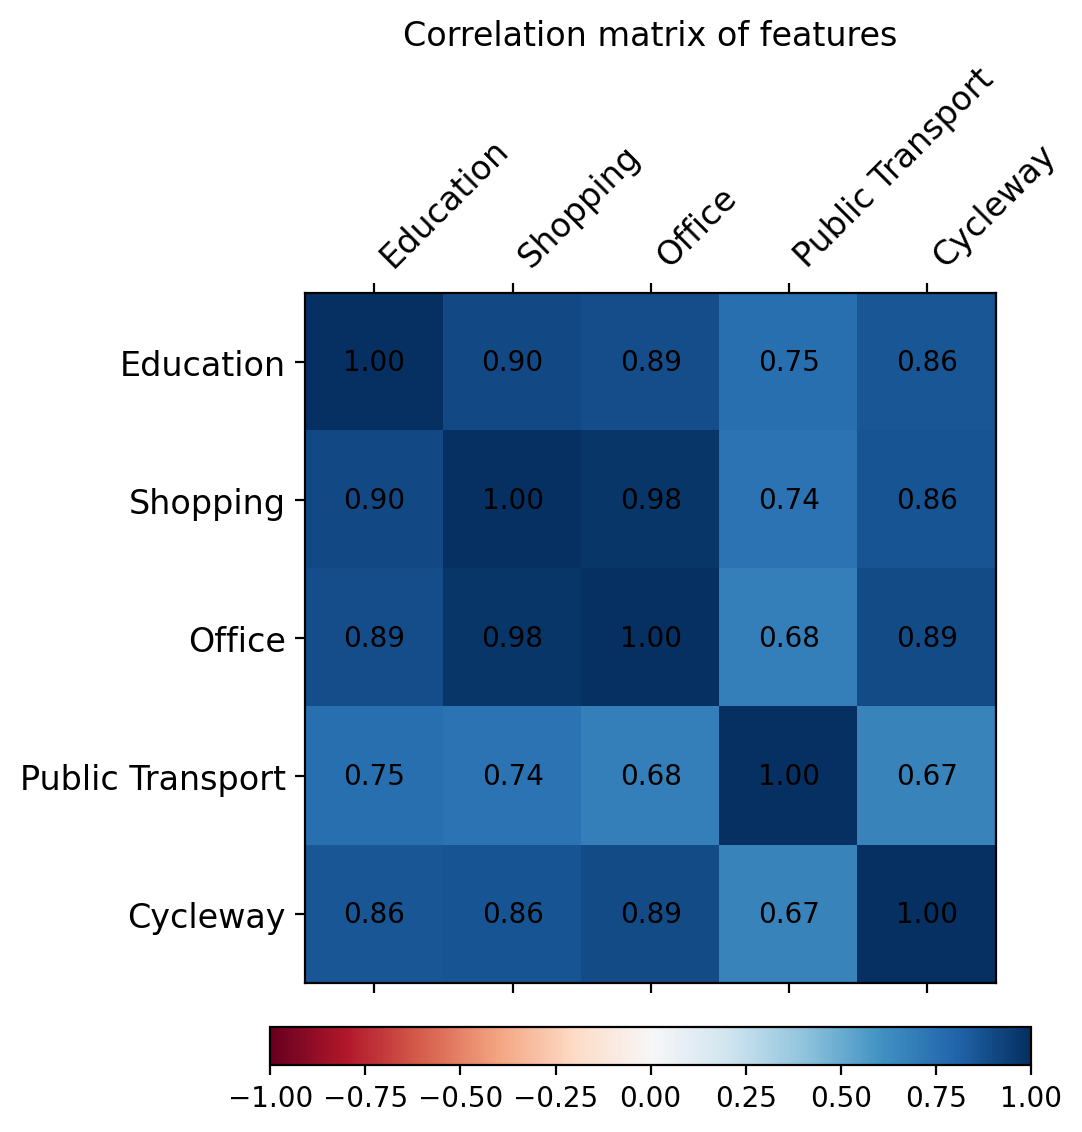

In [12]:
assess.plot_features_matrix(pois_df)

Within this 100 sample, we can observe that the chosen five features are all positively correlated, and shopping and office in particular, have a near perfect correlation which may cause multi-collinearity issues as mentioned. Therefore, they should be removed before doing the regresssion.

Similarly, we can plot the correlation matrix for the household size dataset:

In [14]:
hh_size_df = access.get_hh_size_df(engine)
hh_size_df

,S1,S2,S3,S4,S5,S6,S7,S8
OA21CD,,,,,,,,
E00000001,34,44,10,6,0,0,0,0
E00000003,27,42,19,17,4,0,0,0
E00000005,26,27,8,2,0,0,0,0
E00000007,38,44,2,2,1,0,0,0
E00000010,96,19,4,3,3,0,0,0
...,...,...,...,...,...,...,...,...
E00190590,33,28,26,19,6,3,1,0
E00190591,22,52,24,24,2,0,0,0
E00190592,29,46,22,25,8,0,0,0


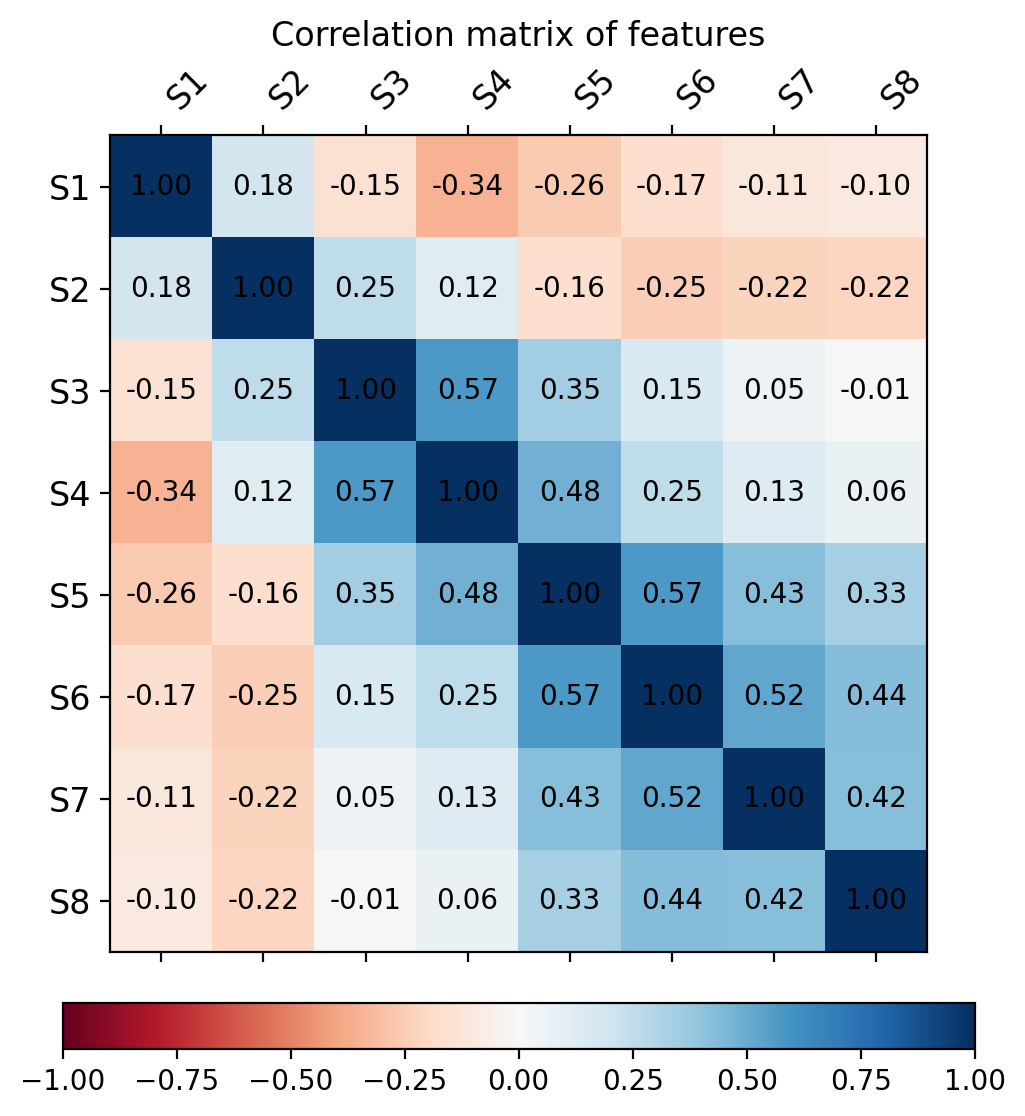

In [15]:
assess.plot_features_matrix(hh_size_df, scatter=False)

We can observe no significant correlation between the household sizes, with the maximum being only 0.57. Therefore, we can use all the sizes as predictor variables.

### Assess summary

In the Assess stage, we examined the various potential OSM and household size features visually, and proposed several possible preprocessing ideas for the address stage including a log-transformation of the target, a feature scaler and removal of highly correlated features. Thanks to the good quality of the data, we did not need to imputate any missing values, but sklearn provides a number of good [techniques](https://scikit-learn.org/stable/modules/impute.html) if need be.

We also modified the access feature-counting functions to account for additional filtering as well as utilising a local overpass API instance to overcome the throughput bottleneck down the line.

We further made the functions flexible and reusable by taking in the dataframes obtained from the access stage; for example, the `plot_features_matrix` function work for both feature sets and regardless of the number of features. 

## Address

In [118]:
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, KBinsDiscretizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import mean_absolute_error
from fynesse.address import SMWrapper

Let's begin with fitting a linear regression with ordinary least squares since it is the simplest and most interpretable model. We increase the size of our samples from 100 in the assess stage to 10000 for more training data. We will also expand the features set to include more variety and areas of interest (e.g. transportation, places).

In [ ]:
features = {
  "Education": [("amenity", [("school", "isced:level", ["2;3", "0;1;2;3", "1;2;3", "3", "2-3"]), 
                             "college", "university"])],
  "Residential H/M": [("building", ["apartments", "terrace"])],
  "Industrial": [("building", ["industrial"])],
  "Commercial": [("building", ["commercial", "retail"])],
  "Tourism": [("tourism", True)],
  "Park": [("leisure", ["park", "dog_park"])],
  "Sport": [("building", ["pavilion", "stadium", "sports_centre"])],
  "Sustenance": [("amenity", ["bar", "cafe", "fast_food", "ice_cream", "pub", "restaurant"])],
  "Entertainment": [("amenity", ["cinema", "nightclub", "theatre"])],
  "Healthcare": [("amenity", ["clinic", "doctors", "hospital"])],
  "Public Service": [("building", ["government", "public"])],
  "Civic": [("building", ["civic"])],
  "Railway station": [("railway", ["station"])],
  "Bus stop": [("highway", ["bus_stop"])],
  "Cycleway": [("highway", ["cycleway"])],
  "Major road": [("highway", ["motorway", "trunk"])],
  "Pedestrian": [("highway", ["pedestrian"])],
  "Urban": [("place", ["city", "borough", "suburb"])],
  "Rural": [("place", ["town", "village", "hamlet"])],
}

subset_df = access.get_subset_df(pc_student_df, col='pc_student', n=10000)
pois_df = access.get_pois_df(subset_df, features, 5)

subset_df.to_csv(data_dir_path + "/subset.csv")
pois_df.to_csv(data_dir_path + "/pois.csv")

We will save the dataframes to csv and load them for faster access later as the initial, uncached query takes roughly 2 hours:

In [17]:
subset_df = pd.read_csv(data_dir_path + "/subset.csv", index_col=0)
pois_df = pd.read_csv(data_dir_path + "/pois.csv", index_col=0)
pois_df

,Education,Residential H/M,Industrial,Commercial,Tourism,Park,Sport,Sustenance,Entertainment,Healthcare,Public Service,Civic,Railway station,Bus stop,Cycleway,Major road,Pedestrian,Urban,Rural
OA21CD,,,,,,,,,,,,,,,,,,,
E00133585,2,906,60,28,11,20,0,47,1,6,1,2,0,68,21,37,32,1,6
E00138834,0,2,0,2,7,0,0,4,0,0,0,0,0,5,0,28,0,0,2
E00024079,37,6511,27,449,599,117,4,1428,33,66,17,5,35,493,600,328,166,12,0
E00095700,0,0,0,1,5,0,0,3,0,0,1,0,0,19,0,1,1,0,7
E00080580,1,583,7,11,3,13,2,25,0,4,1,1,1,140,81,41,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00108097,0,139,24,21,10,22,0,12,0,6,0,1,1,127,181,19,7,4,0
E00122983,2,7,2,15,25,4,0,87,2,2,0,0,1,107,136,0,4,4,2
E00001492,10,621,14,102,38,55,5,176,3,10,1,3,5,304,164,116,9,9,1


Let's examine the new correlation matrix:

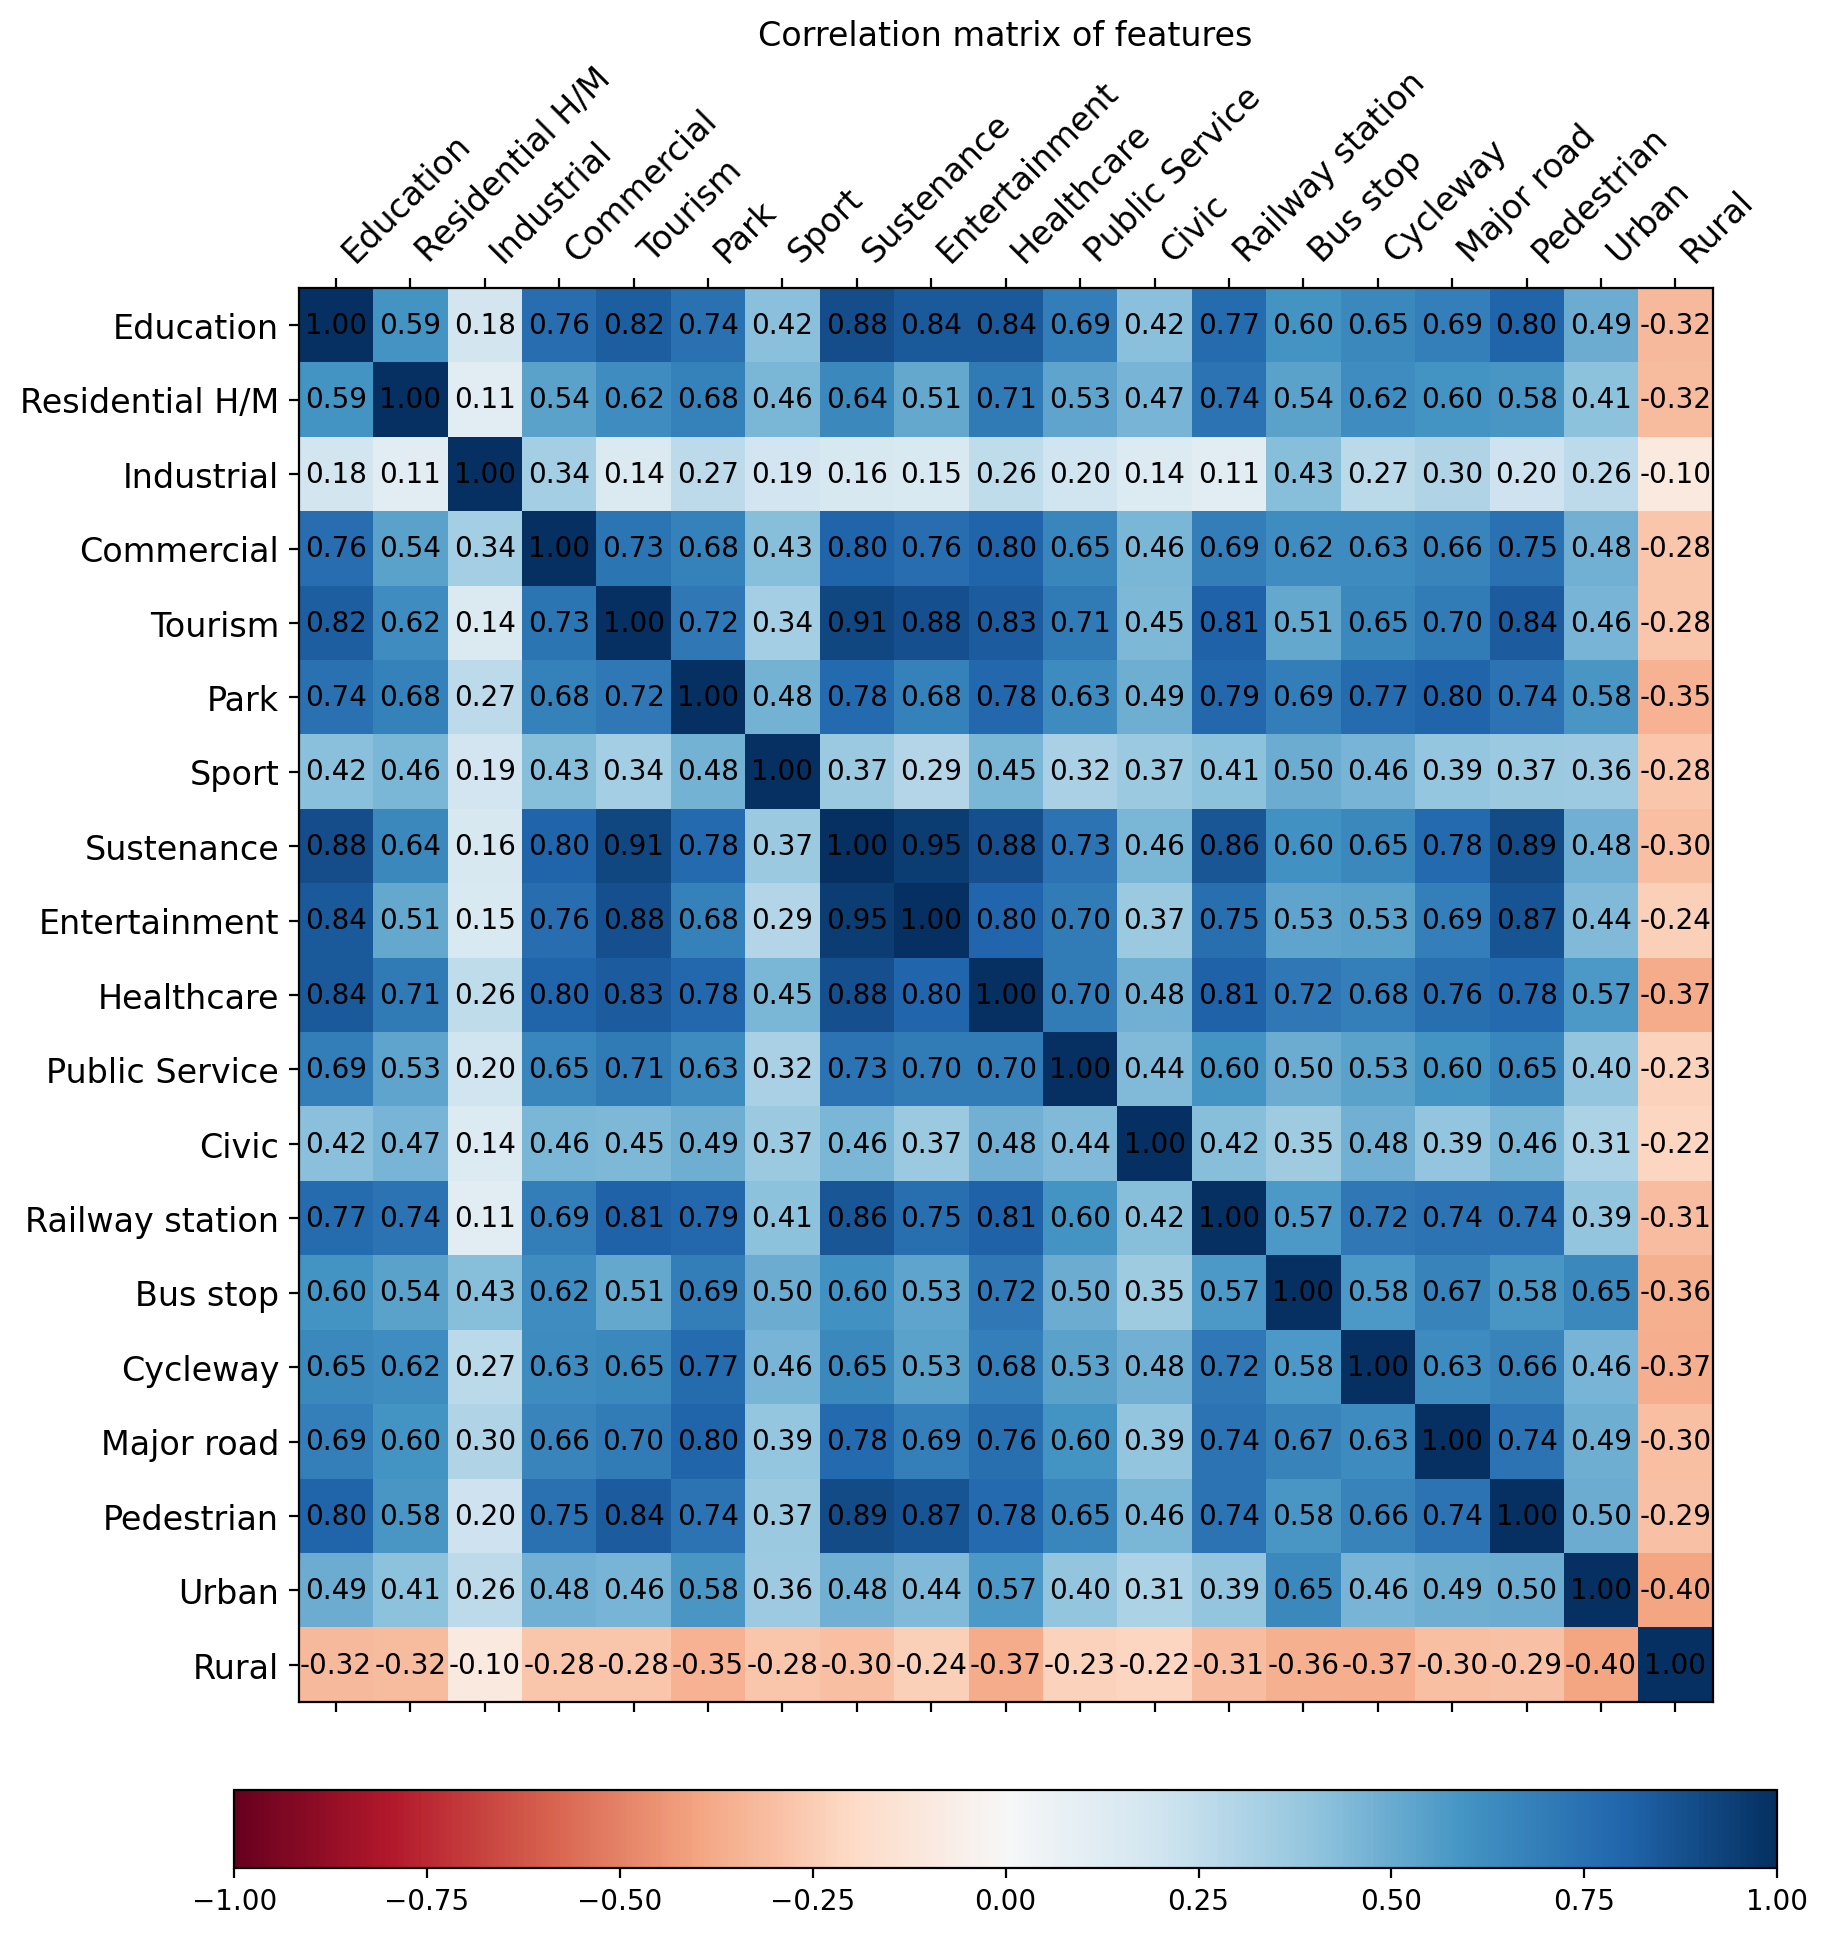

In [18]:
assess.plot_features_matrix(pois_df, scatter=False)

We will remove three counts since they are highly correlated with other features.

In [19]:
pois_df.drop(columns=['Sustenance', 'Entertainment', 'Pedestrian'], inplace=True)

If we fit an OLS model as-is, it performs very poorly:

MAE: 0.031793
Adjusted R-squared: 0.191062


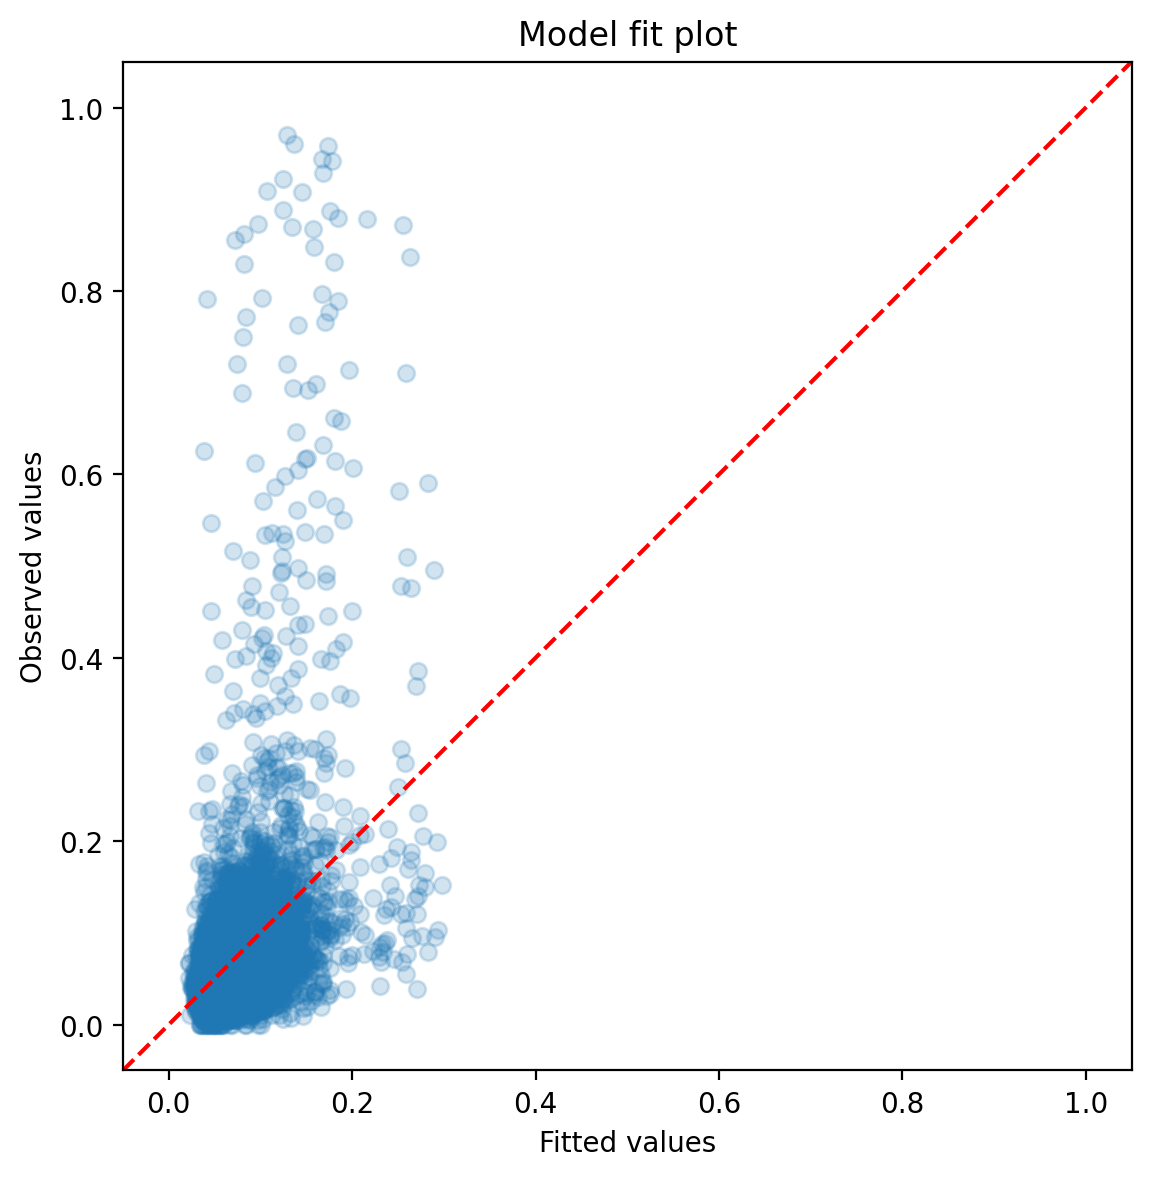

In [24]:
y = subset_df['pc_student'].to_numpy()
X = pois_df.to_numpy()
X = sm.add_constant(X)

result = sm.OLS(y, X).fit()
mae = mean_absolute_error(y, result.fittedvalues)
print(f"MAE: {mae:2f}")
print(f"Adjusted R-squared: {result.rsquared_adj:2f}")
address.plot_fitted(result.fittedvalues, y)

From the plot we can observe that this simple model always underestimate for large observed values. This indicates our model is perhaps too inflexible with too few features to work with. Let's create some synthetic features using non-linear transformations. We will also apply a robust scaler for better range and robustness to outliers as discussed in the assess stage:

MAE: 0.031425
Adjusted R-squared: 0.239775


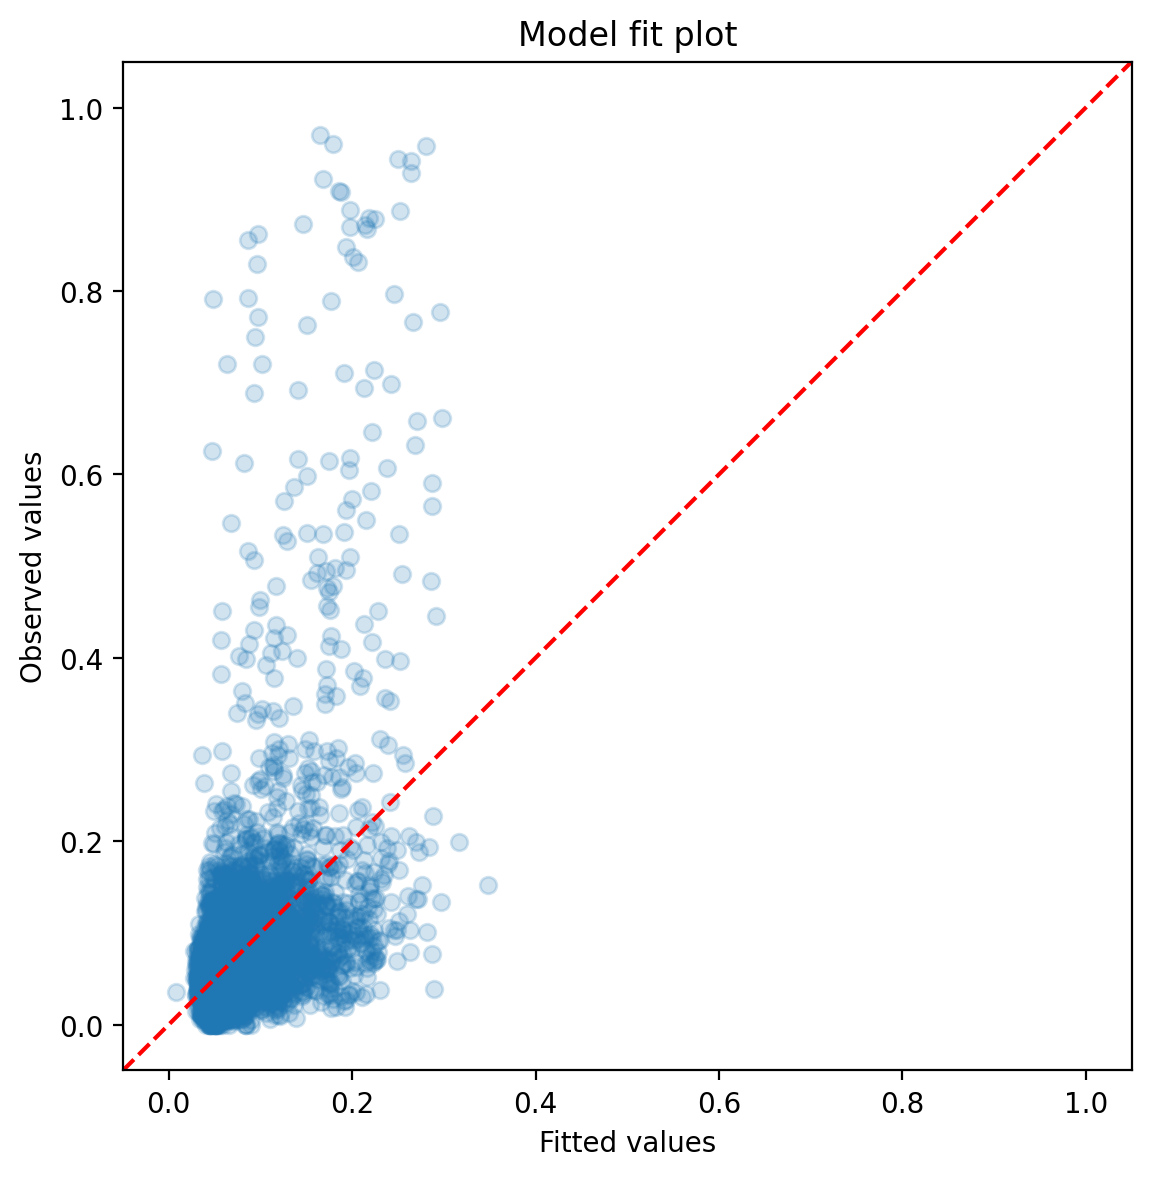

In [25]:
y = subset_df['pc_student'].to_numpy()
X = pois_df.to_numpy()
# non-linear transformation
X = np.concat([X, X**2, X**3, np.log(X + 1), np.sqrt(X)], axis=1)
# robust scaling
X = RobustScaler().fit_transform(X)
X = sm.add_constant(X)

result = sm.OLS(y, X).fit()
mae = mean_absolute_error(y, result.fittedvalues)
print(f"MAE: {mae:2f}")
print(f"Adjusted R-squared: {result.rsquared_adj:2f}")
address.plot_fitted(result.fittedvalues, y)

It still performs poorly with limited improvement. Let's try `PolynomialFeatures` that create interactions between features:

MAE: 0.030640
Adjusted R-squared: 0.305925


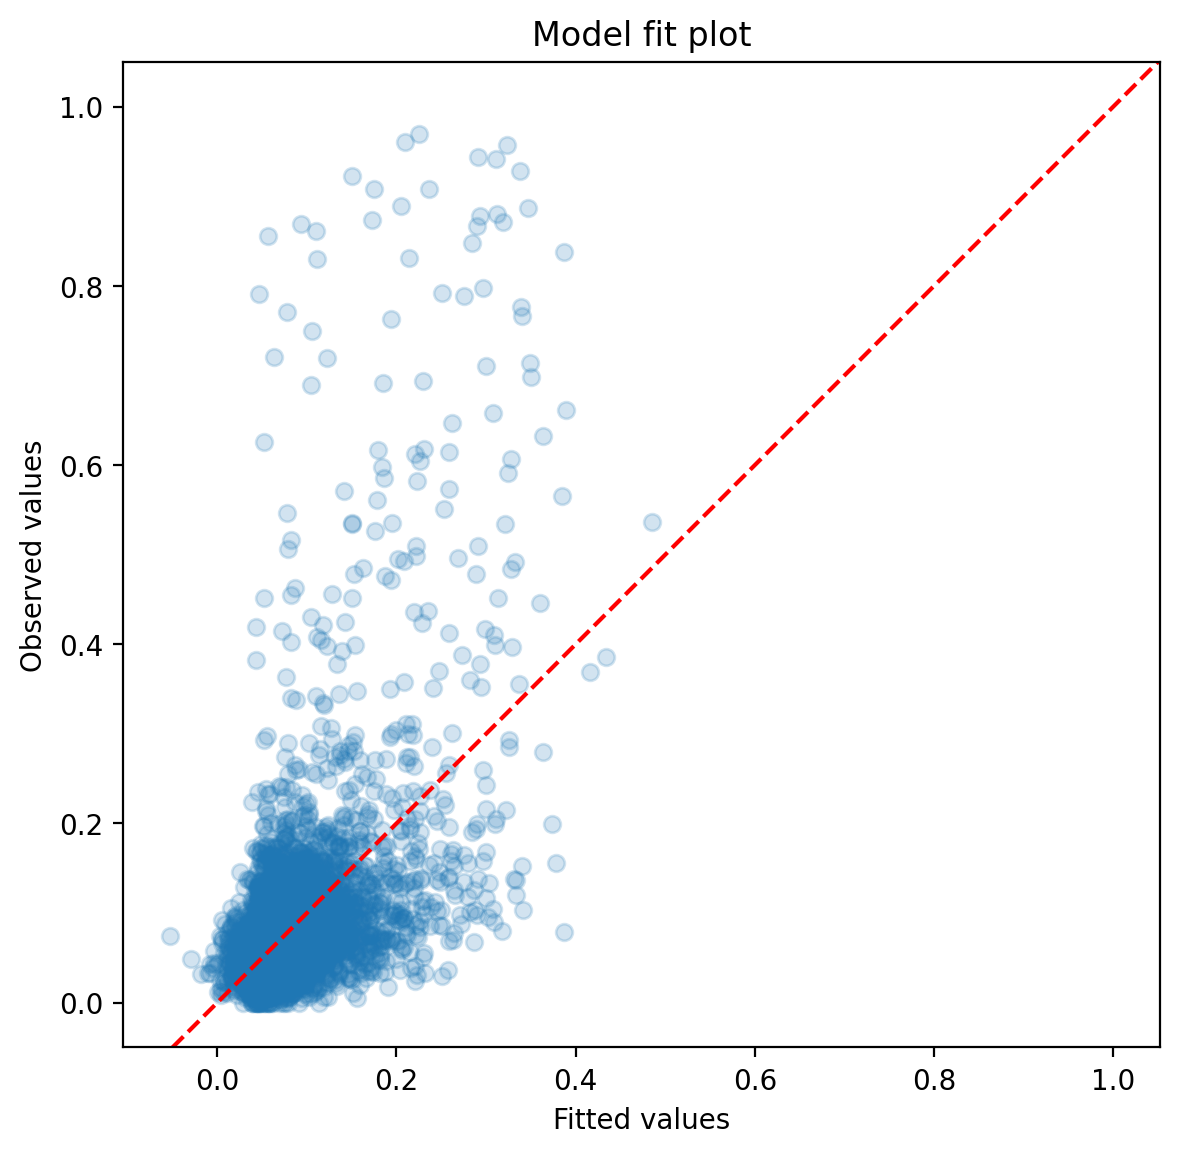

In [26]:
y = subset_df['pc_student'].to_numpy()
X = pois_df.to_numpy()
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X = RobustScaler().fit_transform(X)
X = sm.add_constant(X)

result = sm.OLS(y, X).fit()
mae = mean_absolute_error(y, result.fittedvalues)
print(f"MAE: {mae:2f}")
print(f"Adjusted R-squared: {result.rsquared_adj:2f}")
address.plot_fitted(result.fittedvalues, y)

We can also try other methods of non-linear transformation such as discretisation and spline transformer, but they perform poorly due to the skewness of our features where the vast majority of the samples have low values:

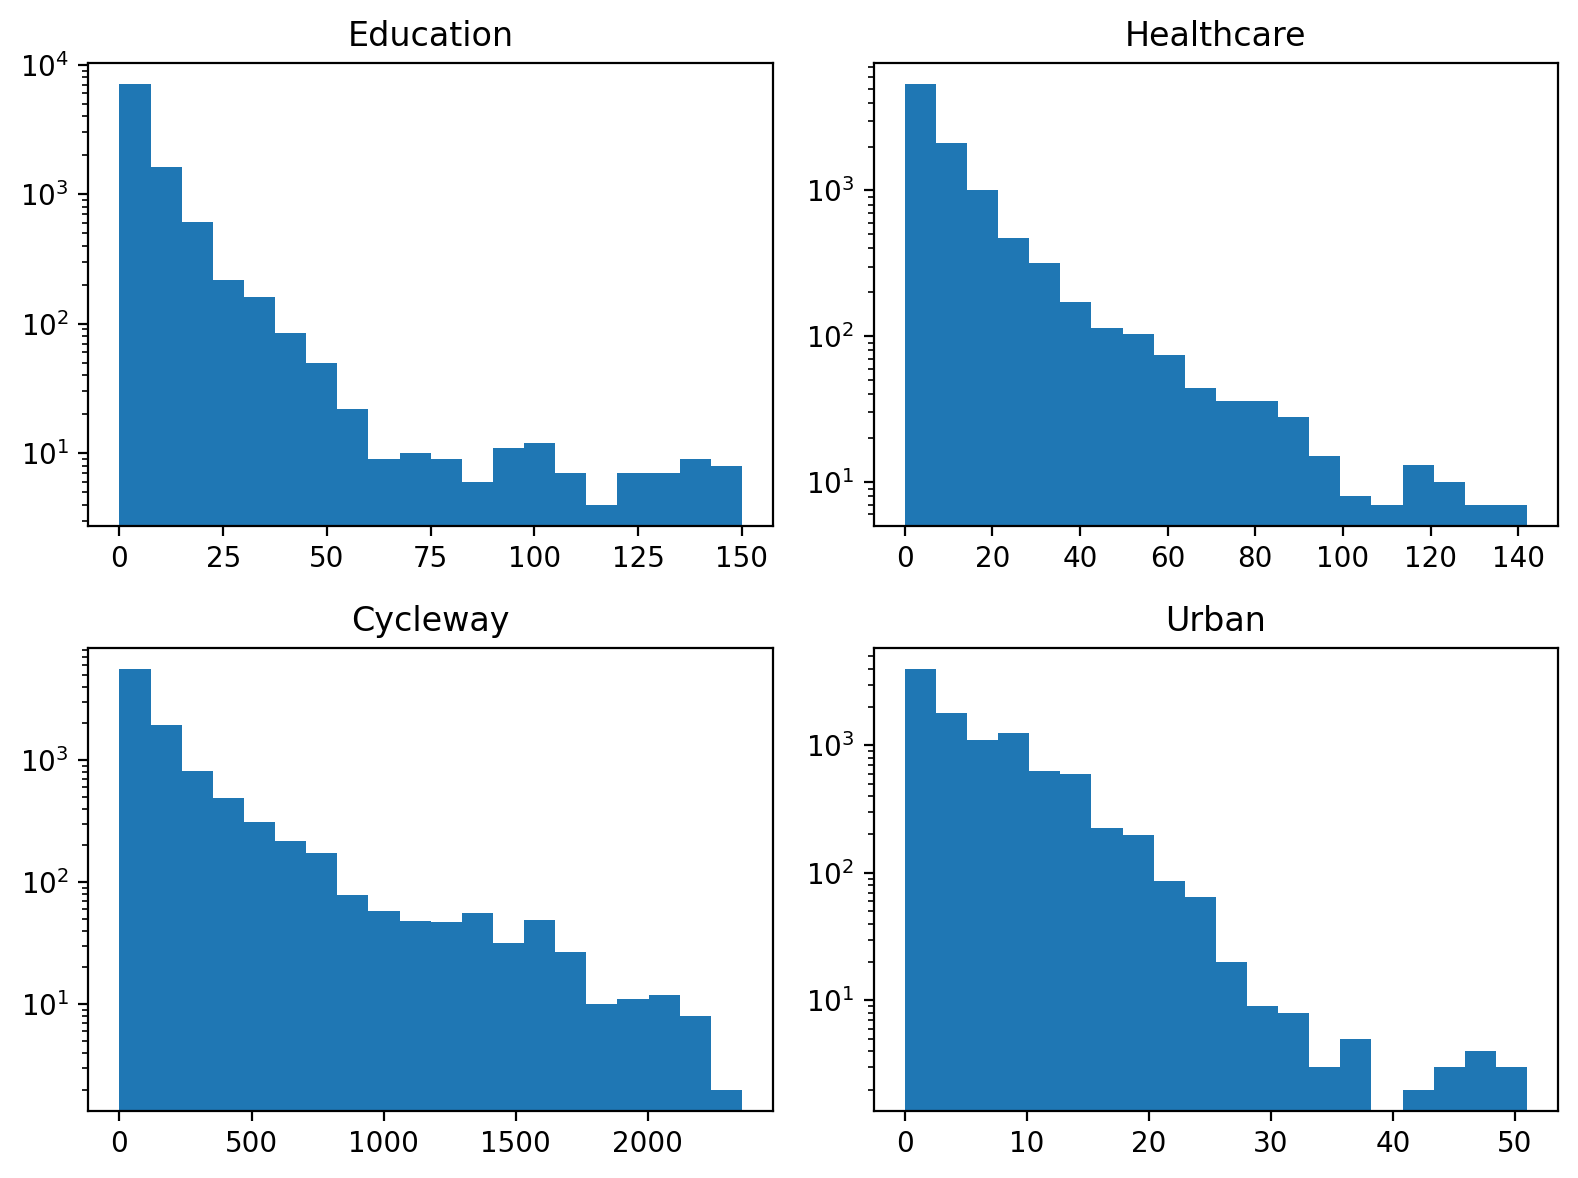

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

features = ["Education", "Healthcare", "Cycleway", "Urban"]

for ax, feature in zip(axs.flatten(), features):
  ax.set_title(feature)
  ax.semilogy()
  ax.hist(pois_df[feature], bins=20)

plt.tight_layout()
plt.show()

Instead, let's use the insight from assess to use a logarithmic link function and apply a generalised linear model (GLM) in addition to the polynomial feature generation and robust scaling. We also keep the Gaussian distribution for now:

MAE: 0.030214
BIC: -27506.244113


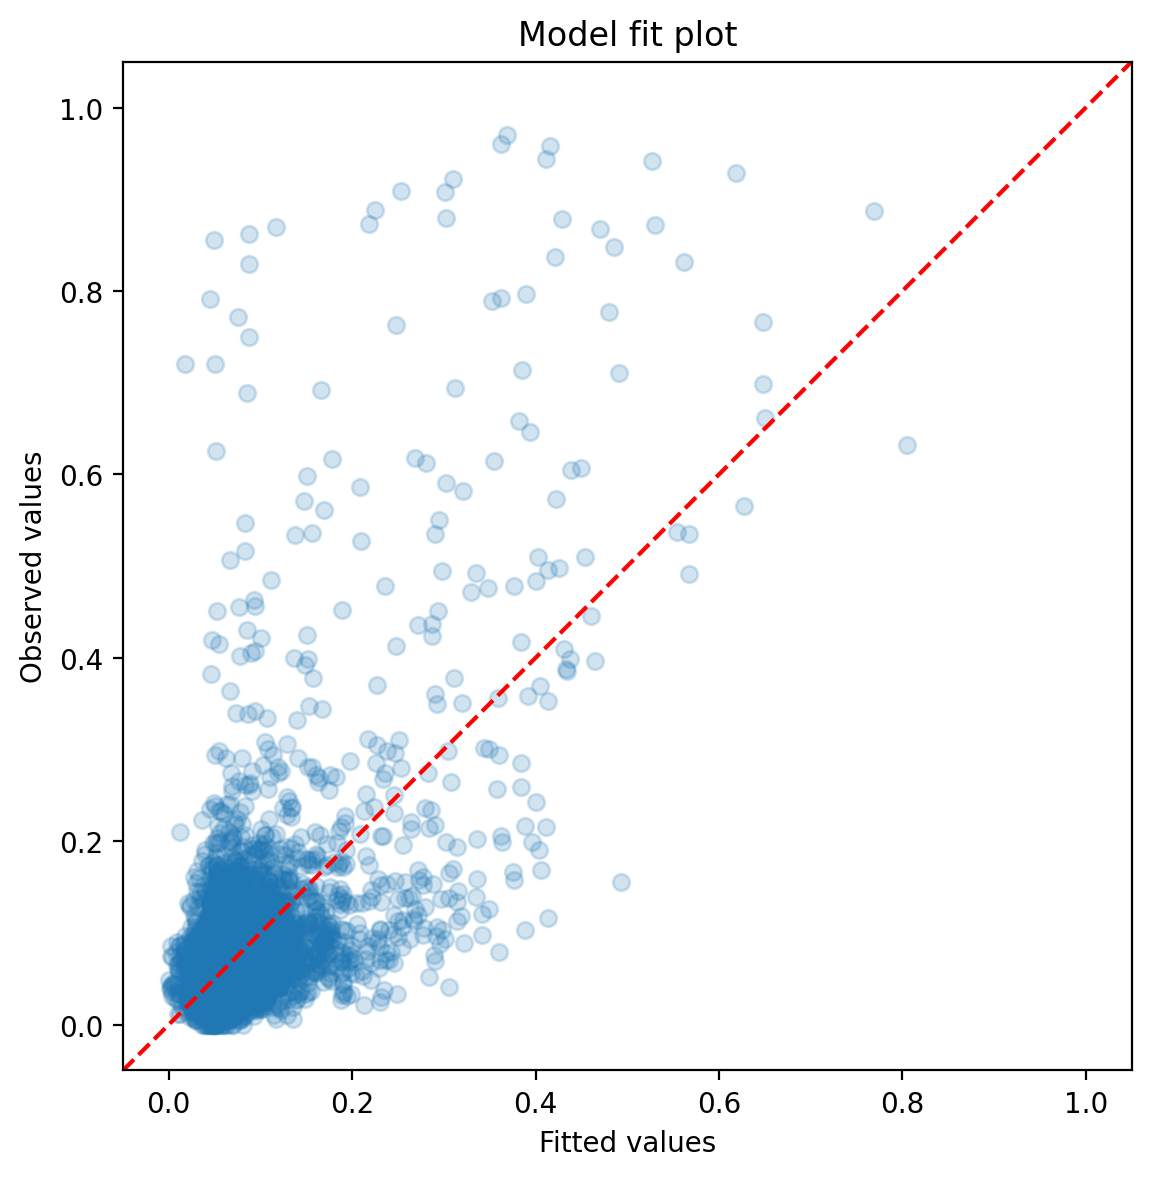

In [28]:
offset = 0.001

y = subset_df['pc_student'].to_numpy()
X = pois_df.to_numpy()
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X = RobustScaler().fit_transform(X)
X = sm.add_constant(X)

model = sm.GLM(y + offset, X, family=sm.genmod.families.Gaussian(link=sm.genmod.families.links.Log()))
result = model.fit()
fitted = result.fittedvalues - offset
mae = mean_absolute_error(y, result.fittedvalues)
print(f"MAE: {mae:2f}")
print(f"BIC: {result.bic_llf:2f}")
address.plot_fitted(fitted, y)

Let's also plot the residual dependence:

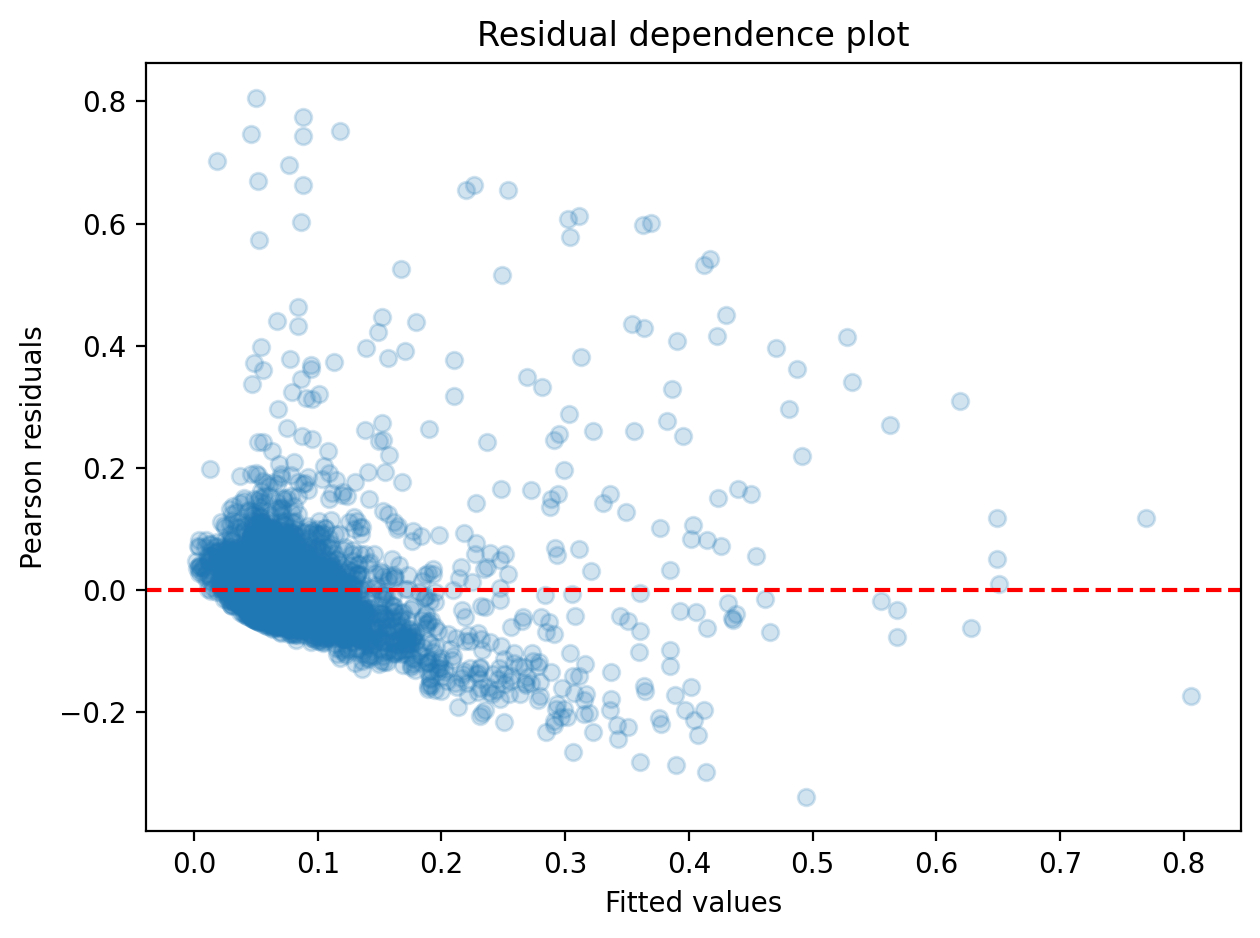

In [29]:
address.plot_resid(result)

In [39]:
bp_fp = sm.stats.diagnostic.het_breuschpagan(result.resid_response, X)[-1]
print(f"p-value for the f-statistic of the Breusch-Pagan test: {bp_fp}")

p-value for the f-statistic of the Breusch-Pagan test: 1.012071392920268e-114


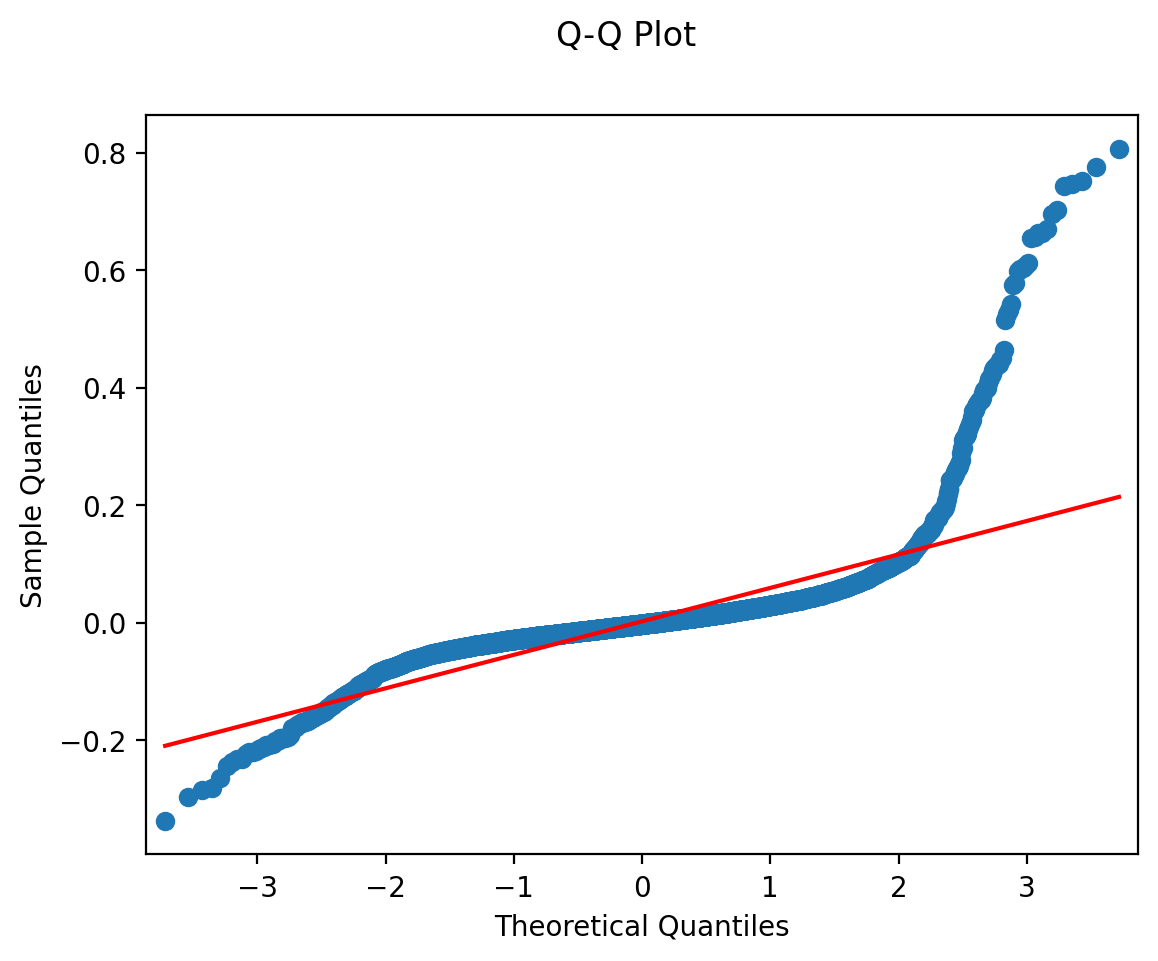

In [40]:
fig = sm.qqplot(result.resid_response, line='s')
fig.suptitle("Q-Q Plot")
plt.show()

There is very strong evidence of heteroskedasticity considering the fan shape spread as the fitted values increase, as well as significant Breusch–Pagan test and the QQ-plot where it shows a very heavy tailed, left skewed distribution. 

However, this may also be the result of poor model fit, due to both the model and feature choices. In this case, this is a more plausible explanation as the GLM model almost always under-predict the targets above 0.3. A more complex model that inherently better captures the non-linear interactions of the features or a mixture model that combine different sub-models (as we explore later) may therefore perform better.

But for now, let's apply Lasso regularisation to reduce the number of features and reduce any potential multicollinear effects with a hyper-parameter grid search of alpha by using the BIC as the scoring function. We then cache the results of the fitted models using `save_results` from address:

In [ ]:
offset = 0.001

y = subset_df['pc_student'].to_numpy()
X = pois_df.to_numpy()
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X = RobustScaler().fit_transform(X)
X = sm.add_constant(X)

model = sm.GLM(y + offset, X, family=sm.genmod.families.Gaussian(link=sm.genmod.families.links.Log()))

alphas = np.logspace(-5, -2, 50)
results = []

for alpha in alphas:
  result = model.fit_regularized(alpha=alpha, L1_wt=1.0, maxiter=200, cnvrg_tol=1e-4, refit=True)
  results.append(result)

address.save_results(results, "pois")

In [41]:
results = address.load_results("pois")

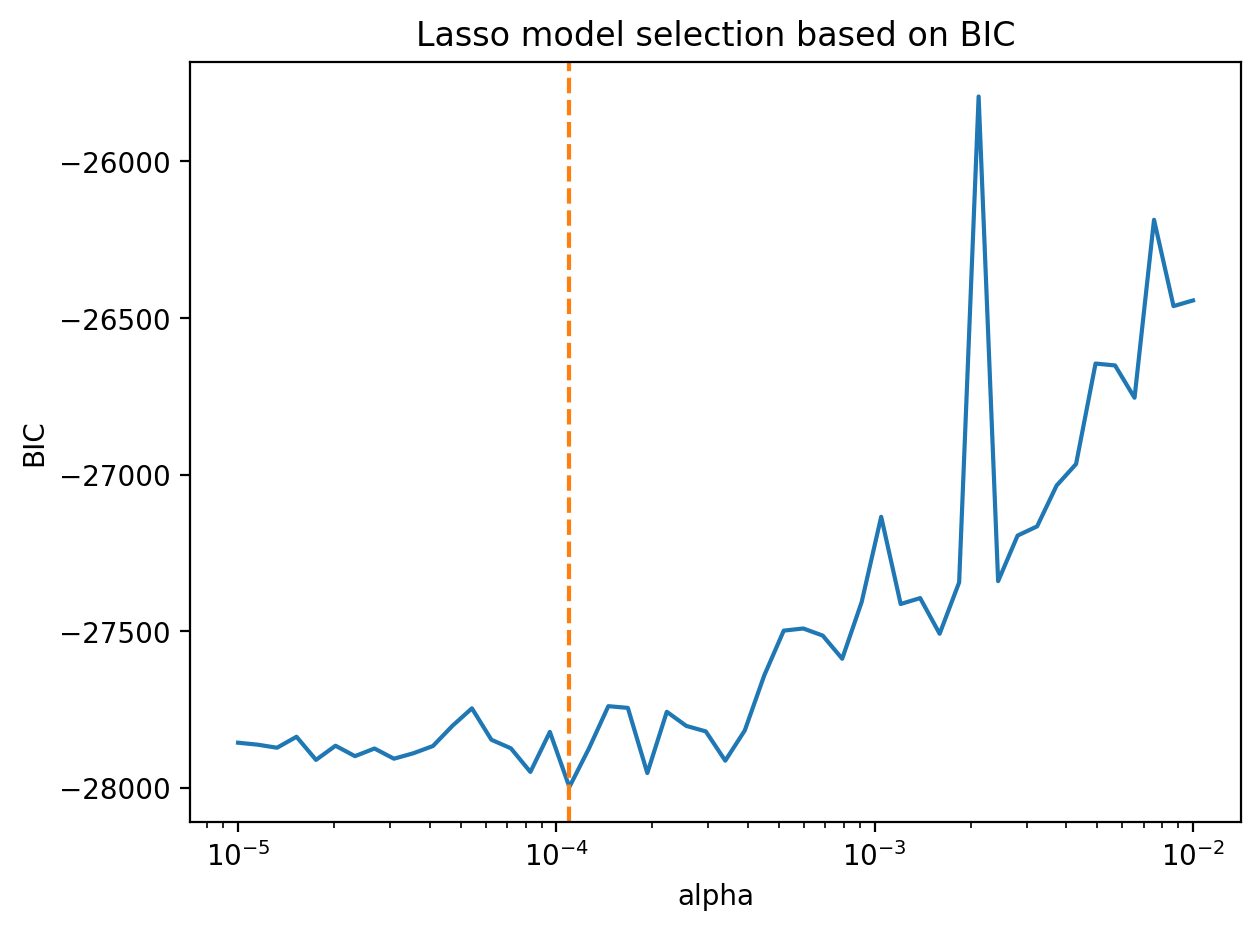

In [48]:
bics = [res.bic_llf for res in results]
best = np.argmin(bics)
alphas = np.logspace(-5, -2, 50)
alpha_best = alphas[best]

fig, ax = plt.subplots()

ax.semilogx()
ax.plot(alphas, bics)
ax.axvline(alpha_best, linestyle='--', color='C1')

ax.set_xlabel("alpha")
ax.set_ylabel("BIC")
ax.set_title("Lasso model selection based on BIC")

plt.tight_layout()

We will also perform a 5-fold cross-validation using the sklearn `Pipeline` and compare the training and test mean absolute error (MAE) for indications of possible overfitting (though this is unlikely given the possible underfitting issues mentioned before).

We define a `SMWrapper` from address that wraps the statsmodels object to be used by sklearn functions for convenience.

In [53]:
offset = 0.001
y = subset_df['pc_student'].to_numpy()
X = pois_df.to_numpy()

pipe = Pipeline([
  ("poly", PolynomialFeatures(degree=2, include_bias=False)),
  ("scale", RobustScaler()),
  ("glm", SMWrapper(sm.GLM, alpha=alpha_best, family=sm.genmod.families.Gaussian(link=sm.genmod.families.links.Log())))
])

In [ ]:
cv = cross_validate(pipe, X, y + offset, 
                scoring="neg_mean_absolute_error", 
                return_train_score=True,
                n_jobs=-1, 
                cv=5)

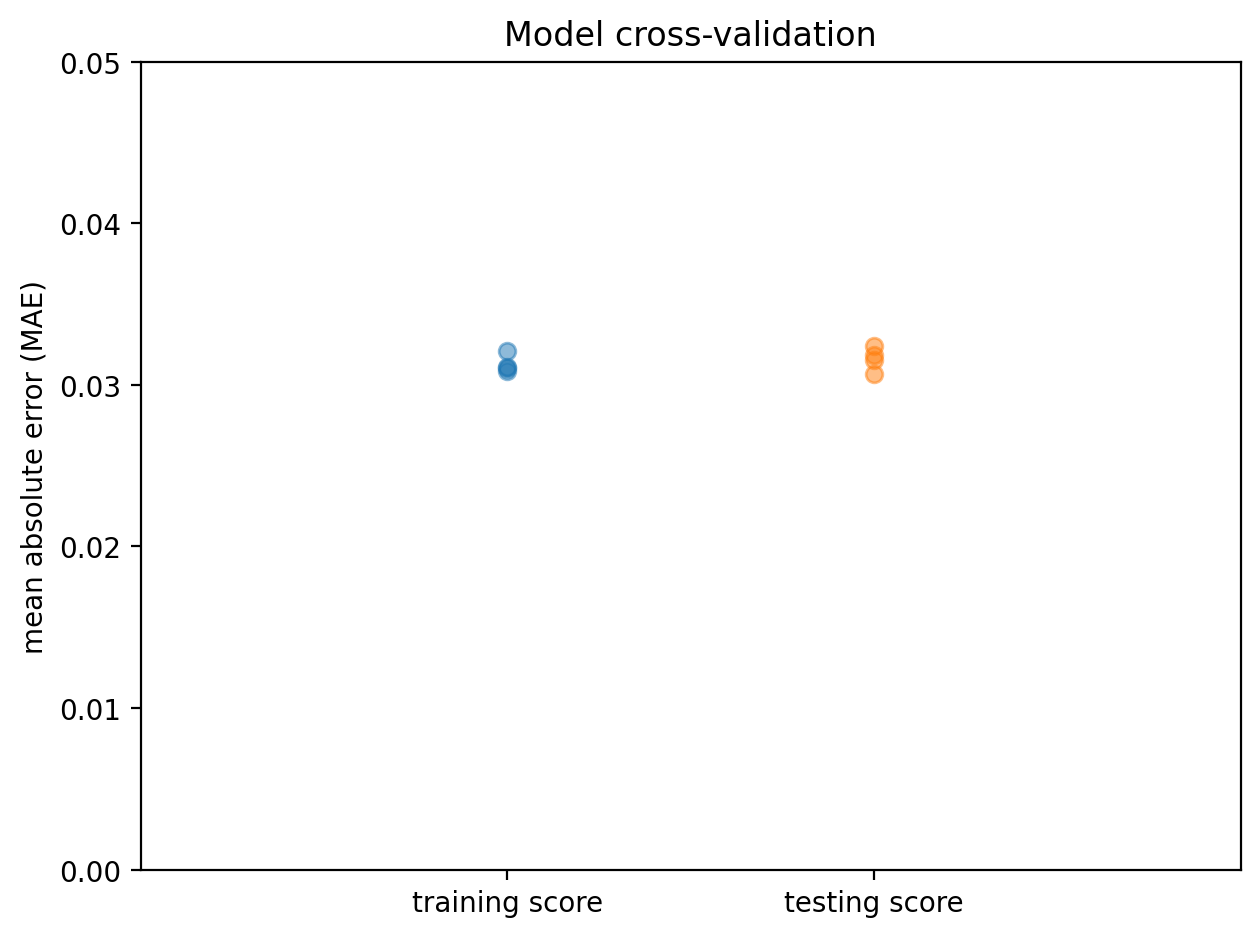

In [144]:
fig, ax = plt.subplots()

ax.scatter([0]*5, cv['train_score'] * -1, alpha=0.5)
ax.scatter([1]*5, cv['test_score'] * -1, alpha=0.5)

ax.set_ylim(0, 0.05)
ax.set_xlim(-1, 2)
ax.set_ylabel('mean absolute error (MAE)')
ax.set_xticks([0, 1], ['training score', 'testing score'])
ax.set_title("Model cross-validation")

plt.tight_layout()

The difference in the MAE is minimal, and thus we can conclude there is very likely no overfitting, as expected.

In [ ]:
pipe_osm = clone(pipe)
pipe_osm.fit(X, y + offset)

We will repeat the process with the household size features:

In [107]:
hh_size_df = access.get_hh_size_df(engine)
hh_size_df = hh_size_df.loc[subset_df.index]
hh_size_df

,S1,S2,S3,S4,S5,S6,S7,S8,latitude,longitude
OA21CD,,,,,,,,,,
E00133585,54,63,16,18,9,2,0,0,52.76976,-0.381660
E00138834,45,81,14,14,5,0,0,1,51.99383,-1.249770
E00024079,55,19,13,10,5,2,1,0,51.51930,-0.197430
E00095700,31,46,10,15,12,3,3,0,50.81964,-4.478990
E00080580,55,34,12,12,8,1,0,1,51.48335,0.373284
...,...,...,...,...,...,...,...,...,...,...
E00108097,16,39,25,27,9,1,0,0,51.56482,0.415763
E00122983,100,79,28,14,0,1,0,0,51.22990,1.400541
E00001492,60,63,28,16,13,0,0,0,51.60424,-0.189690


We again reuse the process of preprocessing and fitting a GLM as before:

MAE: 0.029341
BIC: -25357.573720


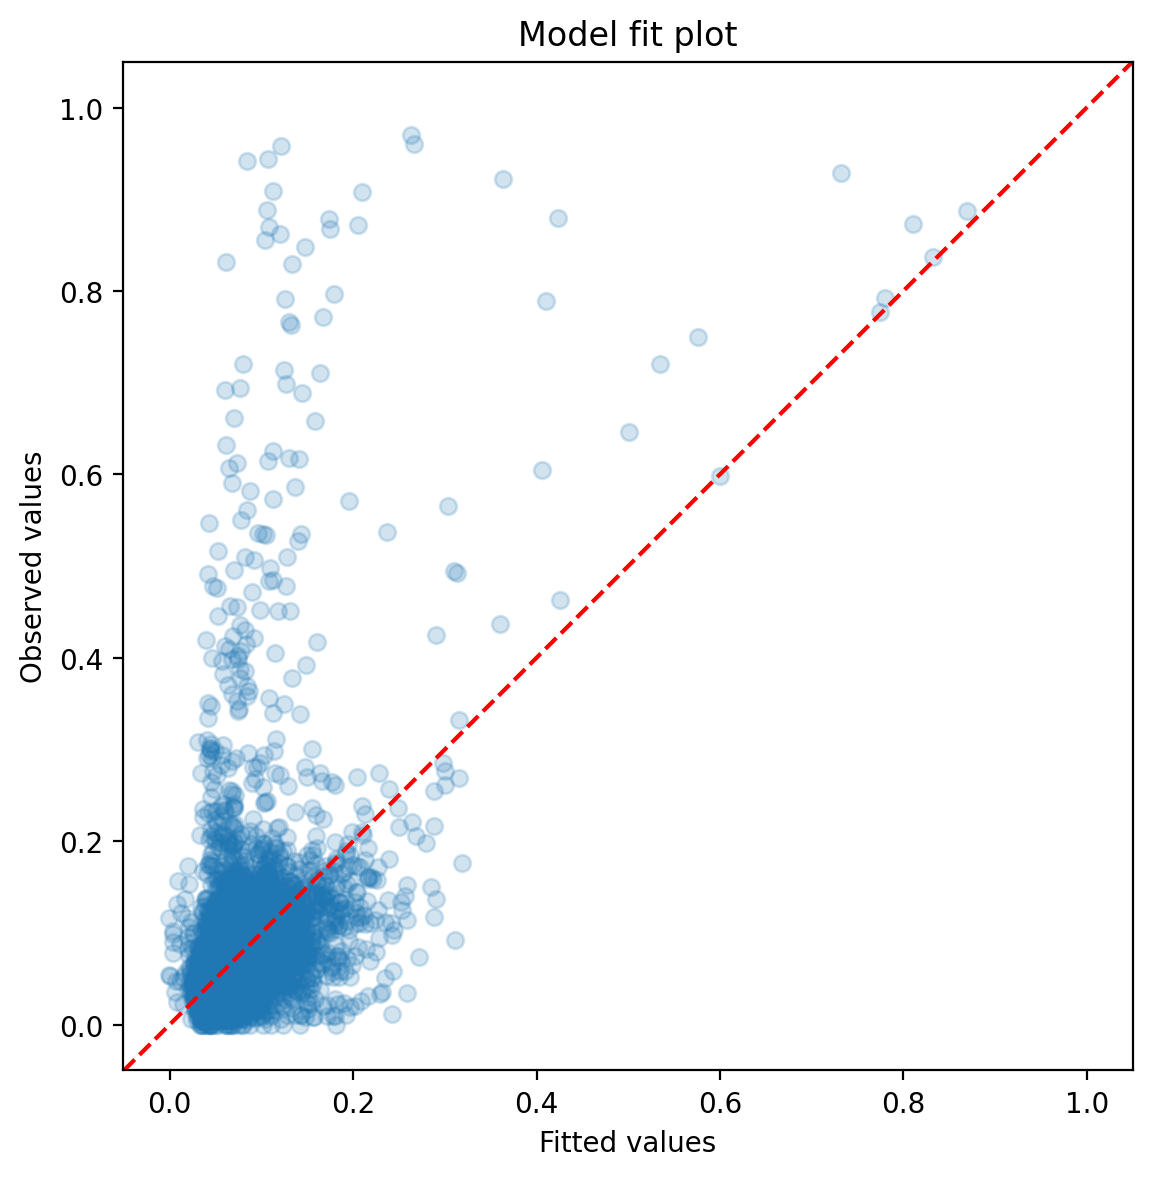

In [152]:
offset = 0.001

y = subset_df['pc_student'].to_numpy()
X = hh_size_df.to_numpy()[:,:-2]
X = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)
X = RobustScaler().fit_transform(X)
X = sm.add_constant(X)

model = sm.GLM(y + offset, X, family=sm.genmod.families.Gaussian(link=sm.genmod.families.links.Log()))
result = model.fit()
fitted = result.fittedvalues
mae = mean_absolute_error(y, result.fittedvalues)
print(f"MAE: {mae:2f}")
print(f"BIC: {result.bic_llf:2f}")
address.plot_fitted(fitted - offset, y)

The MAE is comparable to the OSM features GLM model, however the BIC indicates that it is actually worse since we are using a polynomial of degree 3 rather than 2 and thus more features.

We can try some more advanced models, such as the Gradient Boosting Regressor which builds an additive model to better capture non-linear interactions between features:

Min training set MAE: 0.026471 at stage 189


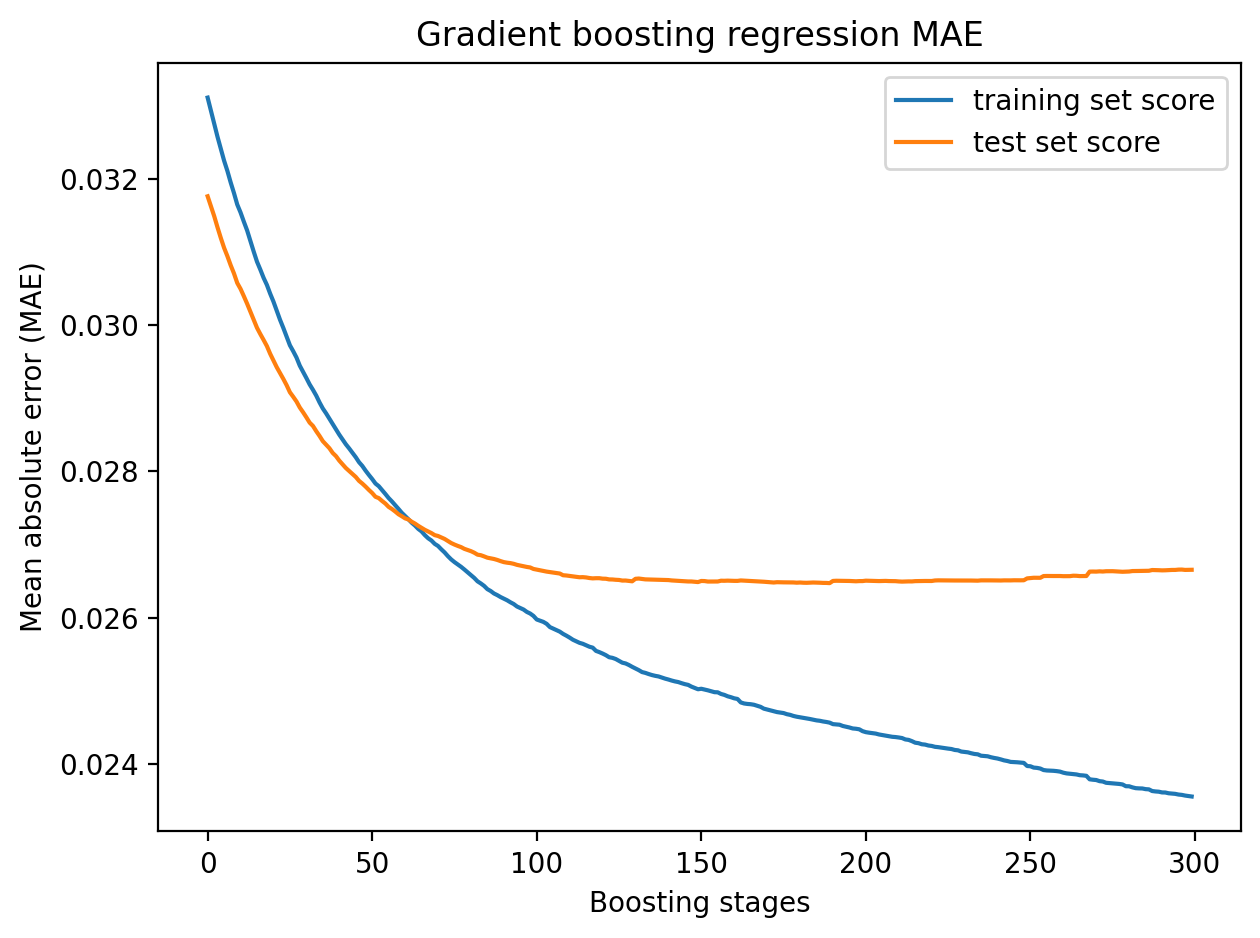

In [153]:
# Adapted from
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

y = subset_df['pc_student'].to_numpy()
X = hh_size_df.to_numpy()[:,:-2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

gbr = GradientBoostingRegressor(
  loss='absolute_error',
  n_estimators=300,
  max_depth=4,
  min_samples_split=10,
  learning_rate=0.02,
  subsample=0.5, 
  random_state=42, 
)
gbr.fit(X_train, y_train)

fitted = gbr.predict(X_test) 

stages = np.arange(gbr.n_estimators_) 
train_score = np.zeros(gbr.n_estimators_, dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(X_train)):
  train_score[i] = sm.tools.eval_measures.meanabs(y_train, y_pred)

test_score = np.zeros(gbr.n_estimators_, dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
  test_score[i] = sm.tools.eval_measures.meanabs(y_test, y_pred)

print(f"Min training set MAE: {test_score.min():2f} at stage {test_score.argmin()}")

fig, ax = plt.subplots()

ax.plot(stages, train_score, label='training set score')
ax.plot(stages, test_score, label='test set score')

ax.set_xlabel('Boosting stages')
ax.set_ylabel('Mean absolute error (MAE)')
ax.set_title('Gradient boosting regression MAE')
ax.legend()

plt.tight_layout()

We can early stop the boosting iterations at around 200 since the test set score MAE no longer decreases at that point to save time and power.

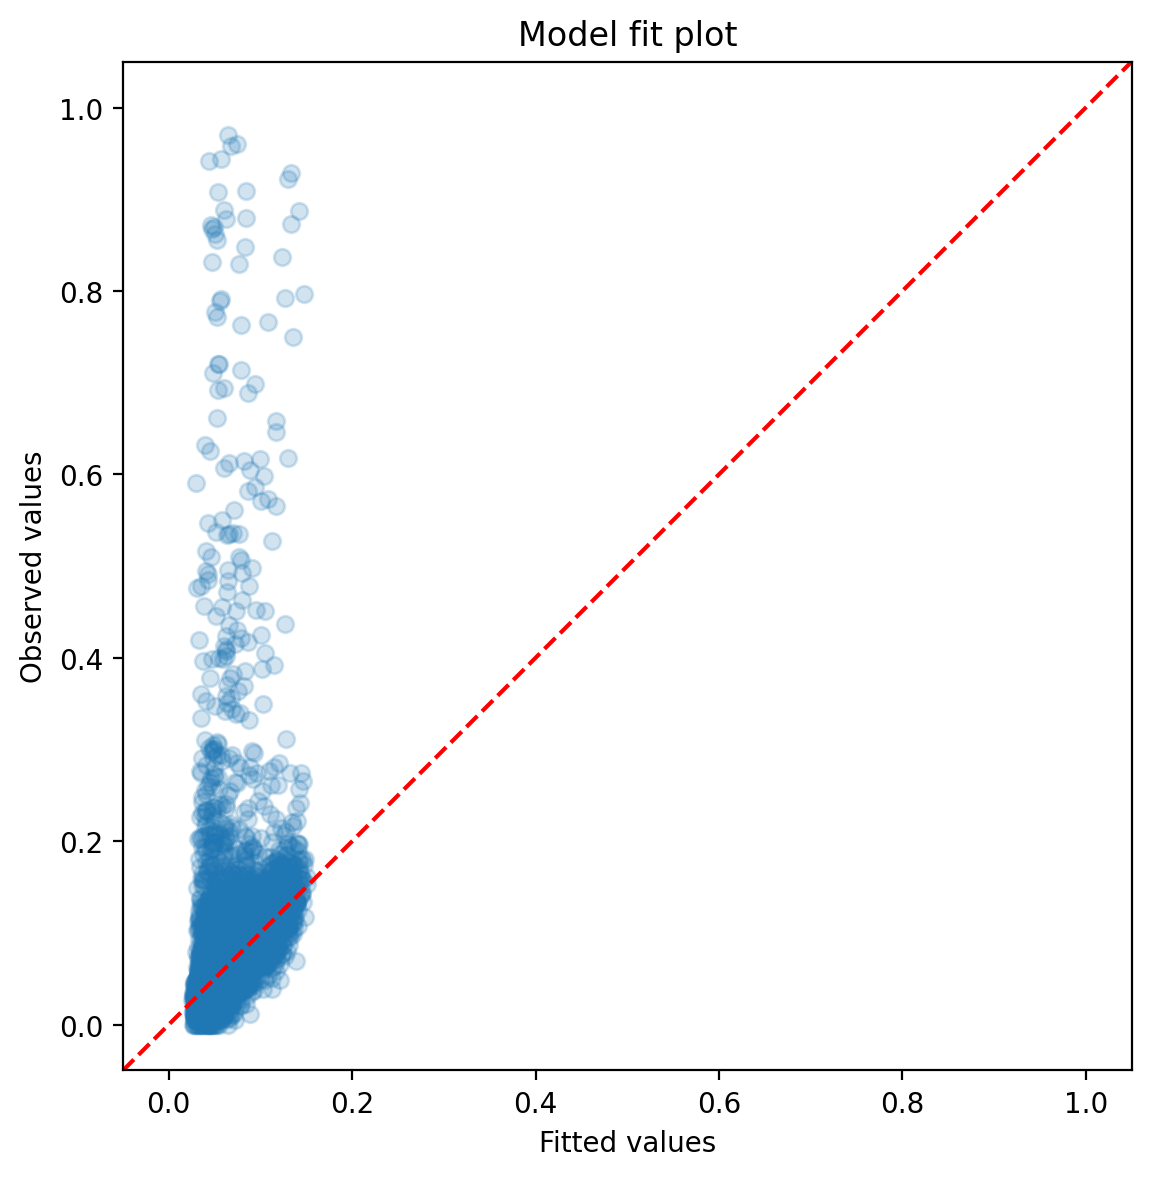

In [154]:
y = subset_df['pc_student'].to_numpy()
X = hh_size_df.to_numpy()[:,:-2]

gbr_hh_size = GradientBoostingRegressor(
  loss='absolute_error',
  n_estimators=200,
  max_depth=4,
  min_samples_split=10,
  learning_rate=0.02,
  subsample=0.5, 
  random_state=42, 
)
gbr_hh_size.fit(X, y)

fitted = gbr_hh_size.predict(X)
address.plot_fitted(fitted, y)

Again, while it does perform better than the other models, it underestimates the higher observed values which suggests a systematic change might be more appropriate, and that household size might not be good predictors of the percentage of students in a given area.

We might also use a different metric for the loss function, for example, the median absolute error which is more robust to outliers, in a quantile regressor model, though it would be difficult to combine with a GLM.

In [111]:
from osmnx.distance import great_circle

In [150]:
features = {
  "Education": [("amenity", [("school", "isced:level", ["2;3", "0;1;2;3", "1;2;3", "3", "2-3"]), 
                             "college", "university"])],
  "Residential H/M": [("building", ["apartments", "terrace"])],
  "Industrial": [("building", ["industrial"])],
  "Commercial": [("building", ["commercial", "retail"])],
  "Tourism": [("tourism", True)],
  "Park": [("leisure", ["park", "dog_park"])],
  "Sport": [("building", ["pavilion", "stadium", "sports_centre"])],
  "Healthcare": [("amenity", ["clinic", "doctors", "hospital"])],
  "Public Service": [("building", ["government", "public"])],
  "Civic": [("building", ["civic"])],
  "Railway station": [("railway", ["station"])],
  "Bus stop": [("highway", ["bus_stop"])],
  "Cycleway": [("highway", ["cycleway"])],
  "Major road": [("highway", ["motorway", "trunk"])],
  "Urban": [("place", ["city", "borough", "suburb"])],
  "Rural": [("place", ["town", "village", "hamlet"])],
}

def estimate_students(latitude: float, longitude: float) -> float:
    """
    Args:
    latitude (float): The latitude coordinate.
    longitude (float): The longitude coordinate.

    Returns:
    float: Estimated share of students in that area (value between 0 and 1).
    """
    x = np.array(list(access.count_pois_near_coordinates(latitude, longitude, features).values()))
    x = x.reshape(1, -1)
    return pipe_osm.predict(x)[0].item()


def estimate_students_hh_size(latitude: float, longitude: float) -> float:
    """
    Args:
    latitude (float): The latitude coordinate.
    longitude (float): The longitude coordinate.

    Returns:
    float: Estimated share of students in that area (value between 0 and 1).
    """
    closest = hh_size_df.apply(lambda row: great_circle(row['latitude'], row['longitude'], latitude, longitude), axis=1).idxmin()
    closest_hh_size = hh_size_df.loc[closest].to_numpy()[:-2].reshape(1, -1)
    return gbr_hh_size.predict(closest_hh_size)[0].item()

The HH size data uses the closest great-circle distance, however further exploration may be carried out to investigate other methods such as average based on the distance from the nearest OAs.

In [157]:
# Cambridge (testing)
latitude = 52.1951
longitude = 0.1313

In [155]:
estimate_students(latitude, longitude)

0.061718473073395695

In [156]:
estimate_students_hh_size(latitude, longitude)

0.0522191609193109

Write a short paragraph summarising what you did in the Address stage.

### Address summary

In the address stage, we used the insights gained in the assess stage to improve on our models, from a simple OLS to more complex GLM models, with successively better fits throughout our iterative designs. However, even at the end, the models are still quite weak. One possible explanation is that the independent variables we provided were simply not enough, and more complex models and more features are required for better predictions. This means a trade-off between simplicity/interpretability with time/computation. 

This is evident when doing hyperparameter tuning. With a regularisation fit and `GridSearchCV` this would involve over 1000 individual fits which would take at least 12 hours to complete. Therefore, a simpler and perhaps less reliable BIC search only on the alpha has to be performed instead.

# Task 2: miniproject (13 marks)

We expect your miniproject to be more advanced than the example project, and that's why we allocated more marks to it. The first 7 marks will be allocated similarly to Task 1.

6 remaining points are *bonus* - they will be allocated for going far beyond what you did in Task 1, either in data access, assess, address or story.

#### Choosing your topic

You are given a lot of flexibility in choosing a miniproject topic.

Some hints:
- Your project should be based on the Census, Price Paid, OSM and Election datasets.
- It's a good idea to pick something that you are interested in.
- Bear in mind there are no marks dedicated to your overall prediction accuracy, so there is no advantage to picking 'easy' topics. It is perfectly ok to not reach significant predictive power, as long as you followed the proper process.

Some guidelines:
- Do not make a miniproject that furthers discriminatory rhetoric. In general, avoid topics that could be insensitive. If in doubt, message Radzim Sendyka (and *cc* Christian Cabrera) to discuss if this applies to your idea.
- Please avoid any projects that would require approval from the ethics comittee.
- Pick the scope of your projects that will allow you to show your skills. Some projects might not be challenging enough while others might be hard to make any progress in. Don't be scared to report negative results.

Please email Radzim Sendyka (and *cc* Christian Cabrera) with your project idea when you begin working on it, so we can let you know about any potential concerns (eg. potentially insensive, too off-topic, too simple, too complex) as soon as we can. You can change the topic up to the submission deadline, but let us know again in cases of major changes.

Most of the advice from Task 1 still applies, particularly around using an online relational database, structuring your notebook, fynesse, access-assess-address, data readiness levels, hints.

Sources you may want to include in your data include:

  - UK Census Data
    - UK Census 2021 data [here](https://www.ons.gov.uk/search?topics=9731,6646,3845,9497,4262,4128,7755,4994,6885,9724,7367&filter=datasets) or [here](https://www.nomisweb.co.uk/sources/census_2021_bulk).
    - Historical Census data [here](https://www.ons.gov.uk/census/historiccensusdata).
    - Geographic coordinates of Census Output Areas [here](https://www.data.gov.uk/dataset/4d4e021d-fe98-4a0e-88e2-3ead84538537/output-areas-december-2021-boundaries-ew-bgc-v2).
  - Spatial data
    - You should already have a connection to OpenStreetMaps.
    - You might want to also download the entire map for England (or more) [here](https://download.openstreetmap.fr/extracts/) or [here](https://wiki.openstreetmap.org/wiki/Planet.osm).
  - Election data
    - Recent Election Results data [here](https://commonslibrary.parliament.uk/research-briefings/cbp-10009/)
    - Historical Election Results data [here](https://commonslibrary.parliament.uk/research-briefings/cbp-8647/#fullreport).
    - Lookup reference between Output Areas and Parliamentary Constituencies [here](https://geoportal.statistics.gov.uk/datasets/5968b5b2c0f14dd29ba277beaae6dec3_0/explore).
  - Price Paid Data
    - You should have this data already in your database.
  - OSM
    - You should know how to access this data from previous practicals.

Example ideas:

- Are areas correlated in terms of census results? If so, find the areas that are leading change, and the ones that are following.
- Which historical census variables used to predict election results in the past, but don't seem related anymore?
- Census results are only updated once a decade, but new roads and houses are built every year. Can census results, for example those relating to travel, be predicted from basic map information, such as street networks?
- Building new houses is our best way of tackling the housing crisis. Use the information on new builds in the house prices dataset to explore what factors drive new developments, and make predictions for where the next houses will be built.
- House styles differ a lot between regions and inhabitants. Can you make any predictions about the house or area simply from looking at it's geometric shape and orientation?

Note that the ideas are just a starting point question. You should include more in-depth investigations into the data, validate your findings where applicable, and prepare visualisations.

## Title and description

### Predict the population changes based on spatial and price paid data.

We attempt to propose, train, evaluate a model to make predictions about the population changes in an area based on the censuses in 2011 and 2021, the spatial (OSM) and price paid data. As the latter data are more readily and timely obtained compared to the census data once every decade, this allows better and faster decision making to allocate funding more appropriately and efficiently to address different needs and issues arising from these changes. 

## Access

We will reuse the download function from part 1, to get _TS001:  	Number of usual residents in households and communal establishments_

In [159]:
access.download_2021_census_oa_data("ts001")

In [13]:
%%sql
DROP TABLE IF EXISTS `pop_21_data`;
-- define table schema 
CREATE TEMPORARY TABLE IF NOT EXISTS `pop_21_data` (
    `OA21CD` char(9) COLLATE utf8_bin NOT NULL PRIMARY KEY,
    `total` int(10) unsigned NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin AUTO_INCREMENT=1;

-- upload data
LOAD DATA LOCAL INFILE "{{data_dir_path}}/census2021-ts001-oa.csv" 
INTO TABLE `pop_21_data`
FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED by '"' LINES STARTING BY '' TERMINATED BY '\n'
IGNORE 1 LINES
(@ignore,@ignore,OA21CD,total,@ignore,@ignore);

SELECT * FROM `pop_21_data` LIMIT 5;

188880 rows affected.

5 rows affected.

OA21CD,total
E00000001,176
E00000003,256
E00000005,112
E00000007,144
E00000010,178


We will download the 2011 census data using a new access function since the namings are different:

In [166]:
access.download_2011_census_oa_data("ks101ew")

In [17]:
%%sql
DROP TABLE IF EXISTS `pop_11_data`;
-- define table schema 
CREATE TEMPORARY TABLE IF NOT EXISTS `pop_11_data` (
    `OA11CD` char(9) COLLATE utf8_bin NOT NULL PRIMARY KEY,
    `total` int(10) unsigned NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin AUTO_INCREMENT=1;

-- upload data
LOAD DATA LOCAL INFILE "{{data_dir_path}}/ks101ewdata.csv" 
INTO TABLE `pop_11_data`
FIELDS TERMINATED BY ',' LINES STARTING BY '' TERMINATED BY '\n'
IGNORE 1 LINES
(OA11CD,total,@ignore,@ignore,@ignore,@ignore,@ignore,@ignore,@ignore,@ignore,@ignore,@ignore,@ignore);

SELECT * FROM `pop_11_data` LIMIT 5;

223722 rows affected.

5 rows affected.

OA11CD,total
E00000001,194
E00000003,250
E00000005,367
E00000007,123
E00000010,102


We will also use the "Output Area (2011) to Output Area (2021) to LAD (December 2022) Best Fit Lookup in EW" dataset from ONS geography [link](https://geoportal.statistics.gov.uk/datasets/ons::output-area-2011-to-output-area-2021-to-lad-december-2022-best-fit-lookup-in-ew/about)

All census and OA mapping dataset are licensed under OGL as before.

In [10]:
%%sql
DROP TABLE IF EXISTS `oa_11_21_lad_data`;
-- define table schema 
CREATE TEMPORARY TABLE IF NOT EXISTS `oa_11_21_lad_data` (
    `db_id` bigint(20) unsigned NOT NULL PRIMARY KEY,
    `OA11CD` char(9) COLLATE utf8_bin NOT NULL,
    `OA21CD` char(9) COLLATE utf8_bin NOT NULL,
    `LAD22CD` char(9) COLLATE utf8_bin NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin AUTO_INCREMENT=1;

-- upload data
LOAD DATA LOCAL INFILE "{{data_dir_path}}/oa_11_21_lad.csv" 
INTO TABLE `oa_11_21_lad_data`
FIELDS TERMINATED BY ',' LINES STARTING BY '' TERMINATED BY '\n'
IGNORE 1 LINES
(db_id, OA11CD, OA21CD, LAD22CD, @ignore, @ignore);

SELECT * FROM `oa_11_21_lad_data` LIMIT 5;

181408 rows affected.

5 rows affected.

db_id,OA11CD,OA21CD,LAD22CD
1,E00000001,E00000001,E09000001
2,E00000003,E00000003,E09000001
3,E00000005,E00000005,E09000001
4,E00000007,E00000007,E09000001
5,E00000010,E00000010,E09000001


We can now join all the data together into a single table that includes the 2011 and 2021 census data, the local authority district (LAD) and its coordinates:

In [28]:
%%sql
DROP TABLE IF EXISTS `pop_data`;
-- define table schema
CREATE TABLE `pop_data` (PRIMARY KEY(OA))
SELECT pop_11_data.total AS pop_11, pop_21_data.total AS pop_21, pop_11_data.OA11CD AS OA,
oa_11_21_lad_data.LAD22CD AS LAD, oa_geo_data.latitude, oa_geo_data.longitude
FROM `pop_11_data`
INNER JOIN `oa_11_21_lad_data` USING (OA11CD)
INNER JOIN `pop_21_data` USING (OA21CD)
INNER JOIN `oa_geo_data` USING (OA21CD)
WHERE `OA21CD` LIKE 'E%';

CREATE INDEX idx_coords ON `pop_data` (latitude,longitude);

SELECT * FROM `pop_data` LIMIT 5;

171372 rows affected.

5 rows affected.

pop_11,pop_21,OA,LAD,latitude,longitude
194,176,E00000001,E09000001,51.52022000,-0.09523000
250,256,E00000003,E09000001,51.51983000,-0.09638000
367,112,E00000005,E09000001,51.51896000,-0.09649000
123,144,E00000007,E09000001,51.51674000,-0.09771000
102,178,E00000010,E09000001,51.52250000,-0.09741000


In [32]:
%sql DESC `pop_data`

6 rows affected.

Field,Type,Null,Key,Default,Extra
pop_11,int(10) unsigned,NO,,None,
pop_21,int(10) unsigned,NO,,None,
OA,char(9),NO,PRI,None,
LAD,char(9),NO,,None,
latitude,"decimal(11,8)",NO,MUL,None,
longitude,"decimal(10,8)",NO,,None,


Similar to before we will set the unique output area code as the primary key and the coordinates pair as another multi-index key, as a proof-of-concept for speed-up if the table is very large.

We can now get the joined dataset as a pandas dataframe:

In [36]:
pop_change_df = access.get_pop_change_df(engine)
pop_change_df

,pop_change,LAD,latitude,longitude
OA,,,,
E00000001,-0.092784,E09000001,51.52022,-0.09523
E00000003,0.024000,E09000001,51.51983,-0.09638
E00000005,-0.694823,E09000001,51.51896,-0.09649
E00000007,0.170732,E09000001,51.51674,-0.09771
E00000010,0.745098,E09000001,51.52250,-0.09741
...,...,...,...,...
E00176770,-0.851891,E08000012,53.45517,-2.96932
E00176771,-0.233494,E08000012,53.39137,-2.89175
E00176772,0.015625,E08000012,53.39020,-2.89004


## Assess

Let's examine the pop_change distribution:

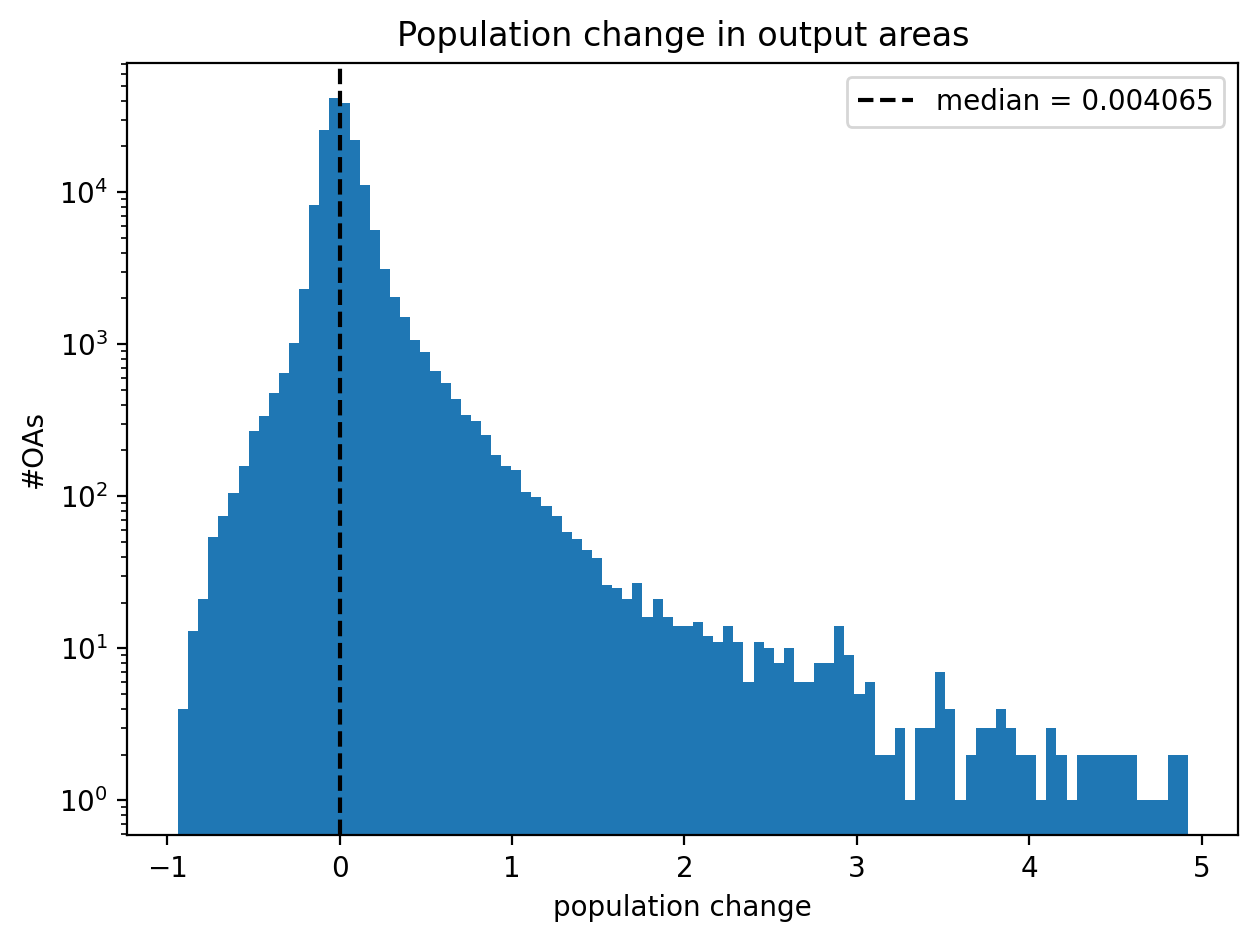

In [77]:
pop_change = pop_change_df['pop_change']
# We will clip the maximum to 5 to zoom in on the details
assess.plot_dist(pop_change[pop_change < 5], 'population change', '#OAs', 'Population change in output areas')

We can observe that compared to the percentage of students dataset, the population change has even more extreme outliers, where one output area has the population explode by 2500%, while most OAs' changes are close to 0 (median being only 0.4%). This suggests simple scaler `MinMaxScaler` would be ineffective. The left-skewed nature of the distribution further suggests some kind of target transformation is needed for better fitting. Since the changes are all greater than -1, we will add one to the pop_change and then apply the logarithmic function when necessary.

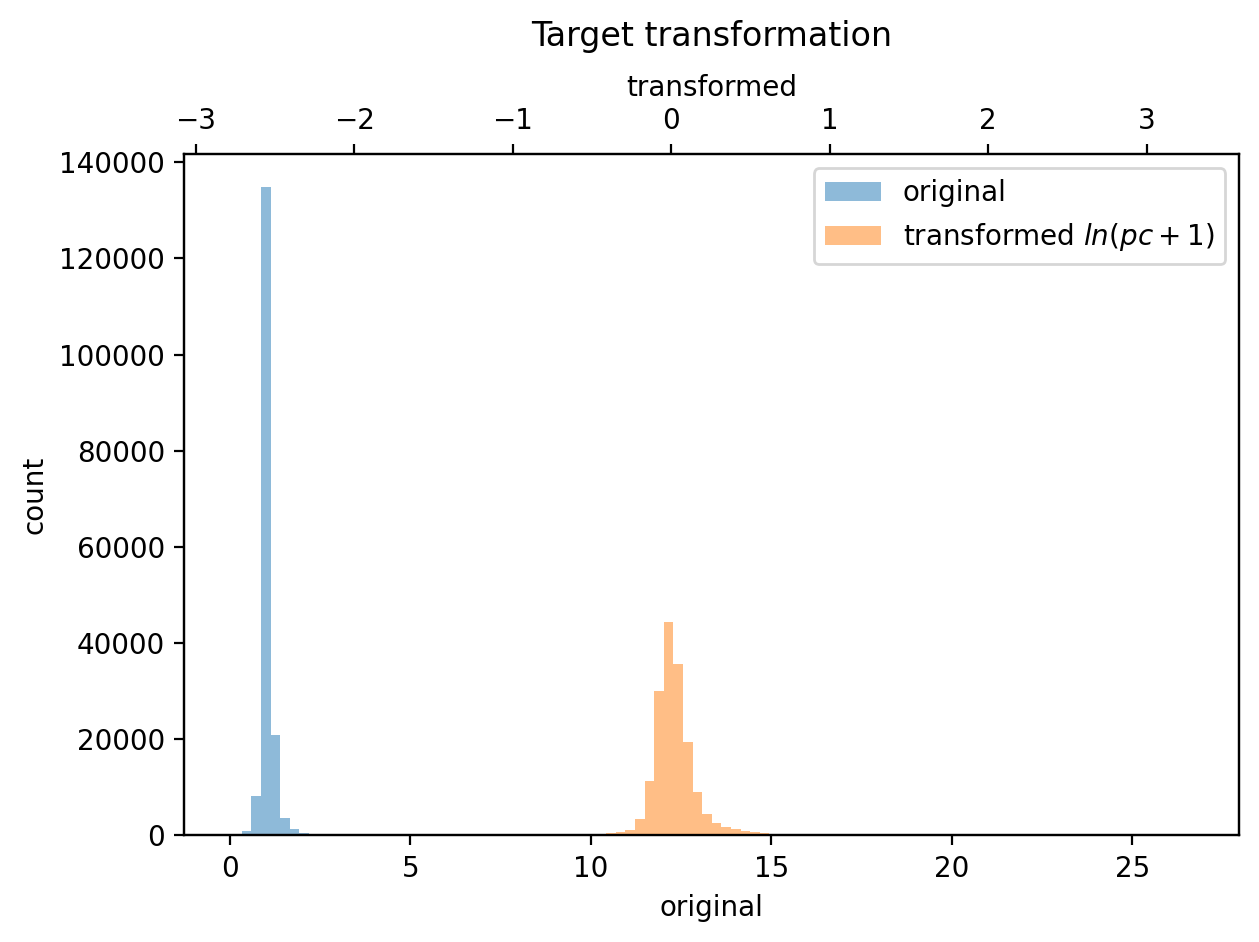

In [83]:
fig, ax = plt.subplots()

original = ax.hist(pop_change + 1, bins=100, alpha=0.5)[2]

ax.set_ylabel('count')
ax.set_xlabel('original')

ax = ax.twiny()
trans = ax.hist(np.log(pop_change + 1), bins=100, alpha=0.5, color='C1')[2]

ax.set_xlabel('transformed')
ax.legend([original, trans], 
          ['original', 'transformed $ln(pc + 1)$'])
ax.set_title('Target transformation', pad=10)

plt.tight_layout()

## Address

In [ ]:
features = {
  "Education": [("amenity", [("school", "isced:level", ["2;3", "0;1;2;3", "1;2;3", "3", "2-3"]), 
                             "college", "university"])],
  "Residential H/M": [("building", ["apartments", "terrace"])],
  "Industrial": [("building", ["industrial"])],
  "Commercial": [("building", ["commercial", "retail"])],
  "Tourism": [("tourism", True)],
  "Park": [("leisure", ["park", "dog_park"])],
  "Sport": [("building", ["pavilion", "stadium", "sports_centre"])],
  "Healthcare": [("amenity", ["clinic", "doctors", "hospital"])],
  "Public Service": [("building", ["government", "public"])],
  "Civic": [("building", ["civic"])],
  "Railway station": [("railway", ["station"])],
  "Bus stop": [("highway", ["bus_stop"])],
  "Cycleway": [("highway", ["cycleway"])],
  "Major road": [("highway", ["motorway", "trunk"])],
  "Urban": [("place", ["city", "borough", "suburb"])],
  "Rural": [("place", ["town", "village", "hamlet"])],
}

In [ ]:
subset_df = access.get_grouped_subset_df(pop_change_df, col='LAD', n=5)
pois_df = access.get_pois_df(subset_df, features, 1)

subset_df.to_csv(data_dir_path + "/subset_1.csv")
pois_df.to_csv(data_dir_path + "/pois_1.csv")

This time we will use a Generalised Linear Mixture Model (GLMM) which has both fixed and random effect compared to only fixed in GLM. This addresses one of the issues we had in part 1, where GLM assumes each and every sample is independent, which is not the case as intuitively spatial proximity correlates areas closer together. We can account for this violation of the GLM independence assumption in GLMM where we assume that there is dependence within each group, here we take it to be the local authority district (LAD), and independence between groups (which we shall discuss the validity of this assumption later) as modelled by the stocastic random effects.

Since `statsmodels` and `sklearn` have very limited support for GLMM, we will use `pymer4` to call `lmer` in R instead.

In [ ]:
from pymer4.models import Lmer

df1 = subset_df[['pop_change', 'LAD']]
df = pois_df
scaler = RobustScaler().set_output(transform='pandas').fit(df)
df = scaler.transform(df)
df = pd.concat([df, df1], axis=1)

model = Lmer("pop_change ~ Education + Residential H/M + Industrial + Commercial + Commercial + ... + (1|LAD)", data=df)

In [116]:
from osmnx.distance import great_circle

def estimate_pop_change(latitude: float, longitude: float) -> float:
    """
    Args:
    latitude (float): The latitude coordinate.
    longitude (float): The longitude coordinate.

    Returns:
    float: Estimated population change from 2011 to 2021 census.
    """
    x = np.array(list(access.count_pois_near_coordinates(latitude, longitude, features).values()))
    x = x.reshape(1, -1)
    x = scaler.transform(x)
    closest = pop_change_df.apply(lambda row: great_circle(row['latitude'], row['longitude'], latitude, longitude), axis=1).idxmin()
    closest_lad = pop_change_df.loc[closest, 'LAD']
    x = np.append(x, closest_lad)
    print(x)
    return pipe_osm.predict(x)[0].item()

In [105]:
# Cambridge (testing)
latitude = 52.1951
longitude = 0.1313

In [ ]:
estimate_pop_change(latitude, longitude)

## Conclusions

The below code is for marking purpuses only, and not part of your project. It helps us gather the data we need without asking you for database credentials, and scouring github pages. This is mandatory. If the code does not work for you, let us know immediately.

1) Please re-run the code from Practical 1 to help us see the contents of your database. We recommend you include all data sources there, but some smaller inputs are fine to use as files.

In [58]:
tables = %sql SHOW TABLES;

for row in tables:
    table_name = row[0]
    print(f"\nTable: {table_name}")

    table_status = %sql SHOW TABLE STATUS LIKE '{{table_name}}'
    approx_row_count = table_status[0][4] if table_status else 'Unable to fetch row count'
    print("\nApprox Row Count:", approx_row_count//100000/10, "M")

    first_5_rows = %sql SELECT * FROM `{{table_name}}` LIMIT 5;
    print(first_5_rows)

    indices = %sql SHOW INDEX FROM `{{table_name}}`;
    if indices:
        print("\nIndices:")
        for index in indices:
            print(f" - {index[2]} ({index[10]}): Column {index[4]}")
    else:
        print("\nNo indices set on this table.")

5 rows affected.


Table: hh_size_geo_data


1 rows affected.


Approx Row Count: 0.1 M


5 rows affected.

+-----------+----+----+----+----+----+----+----+----+-------------+-------------+
|   OA21CD  | S1 | S2 | S3 | S4 | S5 | S6 | S7 | S8 |   latitude  |  longitude  |
+-----------+----+----+----+----+----+----+----+----+-------------+-------------+
| E00000001 | 34 | 44 | 10 | 6  | 0  | 0  | 0  | 0  | 51.52022000 | -0.09523000 |
| E00000003 | 27 | 42 | 19 | 17 | 4  | 0  | 0  | 0  | 51.51983000 | -0.09638000 |
| E00000005 | 26 | 27 | 8  | 2  | 0  | 0  | 0  | 0  | 51.51896000 | -0.09649000 |
| E00000007 | 38 | 44 | 2  | 2  | 1  | 0  | 0  | 0  | 51.51674000 | -0.09771000 |
| E00000010 | 96 | 19 | 4  | 3  | 3  | 0  | 0  | 0  | 51.52250000 | -0.09741000 |
+-----------+----+----+----+----+----+----+----+----+-------------+-------------+


2 rows affected.


Indices:
 - idx_coords (BTREE): Column latitude
 - idx_coords (BTREE): Column longitude

Table: nssec_geo_data


1 rows affected.


Approx Row Count: 0.1 M


5 rows affected.

+-----------+-------+--------+--------+----+------+--------+-----+-----+-----+-----+-------------+-------------+
|   OA21CD  | total | L1_2_3 | L4_5_6 | L7 | L8_9 | L10_11 | L12 | L13 | L14 | L15 |   latitude  |  longitude  |
+-----------+-------+--------+--------+----+------+--------+-----+-----+-----+-----+-------------+-------------+
| E00000001 |  159  |   80   |   38   | 13 |  9   |   3    |  5  |  5  |  4  |  2  | 51.52022000 | -0.09523000 |
| E00000003 |  222  |   96   |   58   | 8  |  26  |   2    |  5  |  2  |  5  |  20 | 51.51983000 | -0.09638000 |
| E00000005 |  103  |   37   |   28   | 8  |  21  |   0    |  3  |  1  |  1  |  4  | 51.51896000 | -0.09649000 |
| E00000007 |  140  |   62   |   39   | 5  |  11  |   3    |  3  |  1  |  6  |  10 | 51.51674000 | -0.09771000 |
| E00000010 |  170  |   34   |   45   | 17 |  27  |   7    |  10 |  14 |  11 |  5  | 51.52250000 | -0.09741000 |
+-----------+-------+--------+--------+----+------+--------+-----+-----+-----+-----+------------

2 rows affected.


Indices:
 - idx_coords (BTREE): Column latitude
 - idx_coords (BTREE): Column longitude

Table: pop_data


1 rows affected.


Approx Row Count: 0.1 M


5 rows affected.

+--------+--------+-----------+-----------+-------------+-------------+
| pop_11 | pop_21 |     OA    |    LAD    |   latitude  |  longitude  |
+--------+--------+-----------+-----------+-------------+-------------+
|  194   |  176   | E00000001 | E09000001 | 51.52022000 | -0.09523000 |
|  250   |  256   | E00000003 | E09000001 | 51.51983000 | -0.09638000 |
|  367   |  112   | E00000005 | E09000001 | 51.51896000 | -0.09649000 |
|  123   |  144   | E00000007 | E09000001 | 51.51674000 | -0.09771000 |
|  102   |  178   | E00000010 | E09000001 | 51.52250000 | -0.09741000 |
+--------+--------+-----------+-----------+-------------+-------------+


3 rows affected.


Indices:
 - PRIMARY (BTREE): Column OA
 - idx_coords (BTREE): Column latitude
 - idx_coords (BTREE): Column longitude

Table: postcode_data


1 rows affected.


Approx Row Count: 2.4 M


5 rows affected.

+----------+------------+----------+---------+----------+------------------------------+----------+-------------+-------------+-------------------+----------------------------+----------------------------+---------------+-------------------+-----------------+---------+--------+-------+
| postcode |   status   | usertype | easting | northing | positional_quality_indicator | country  |   latitude  |  longitude  | postcode_no_space | postcode_fixed_width_seven | postcode_fixed_width_eight | postcode_area | postcode_district | postcode_sector | outcode | incode | db_id |
+----------+------------+----------+---------+----------+------------------------------+----------+-------------+-------------+-------------------+----------------------------+----------------------------+---------------+-------------------+-----------------+---------+--------+-------+
| AB1 0AA  | terminated |  small   |  385386 |  801193  |              1               | Scotland | 57.10147400 | -2.24285100 |       AB10A

2 rows affected.


Indices:
 - PRIMARY (BTREE): Column db_id
 - idx_po_postcode (BTREE): Column postcode

Table: pp_data


1 rows affected.


Approx Row Count: 28.2 M


5 rows affected.

+----------------------------------------+--------+------------------+----------+---------------+----------------+-------------+---------------------------------+-----------------------------------+-------------------+------------+------------+-----------------+----------------+-------------------+---------------+-------+
|     transaction_unique_identifier      | price  | date_of_transfer | postcode | property_type | new_build_flag | tenure_type | primary_addressable_object_name | secondary_addressable_object_name |       street      |  locality  | town_city  |     district    |     county     | ppd_category_type | record_status | db_id |
+----------------------------------------+--------+------------------+----------+---------------+----------------+-------------+---------------------------------+-----------------------------------+-------------------+------------+------------+-----------------+----------------+-------------------+---------------+-------+
| {109BBF80-1E51-4910-8E2C-B

3 rows affected.


Indices:
 - PRIMARY (BTREE): Column db_id
 - idx_pp_postcode (BTREE): Column postcode
 - idx_pp_date_transfer (BTREE): Column date_of_transfer


2) Please paste a link to your fynesse library below, and make sure it's publically accessible. Also run the code below, and make sure it worked, printing out the contents of your library.

In [ ]:
# fynesse_url = '<your-url-library-here>'
%pip install git+https://github.com/my4ng/my385_ads_2024.git

In [59]:
import fynesse
import os

print('FYNESSE STRUCTURE:')
package_path = os.path.dirname(fynesse.__file__)
for root, dirs, files in os.walk(package_path):
    level = root.replace(package_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{sub_indent}{f}")

print('FILE CONTENTS')
for root, dirs, files in os.walk(package_path):
    for file in files:
        file_path = os.path.join(root, file)
        print(f"--- Contents of {file_path} ---\n")
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                print(f.read())
        except Exception as e:
            print(f"Could not read {file_path}: {e}")
        print("\n" + "-" * 50 + "\n")

FYNESSE STRUCTURE:
fynesse/
    __init__.py
    access.py
    address.py
    assess.py
    config.py
    defaults.yml
    __pycache__/
        __init__.cpython-311.pyc
        config.cpython-311.pyc
        __init__.cpython-313.pyc
        config.cpython-313.pyc
        assess.cpython-313.pyc
        access.cpython-313.pyc
        assess.cpython-311.pyc
        address.cpython-311.pyc
        access.cpython-311.pyc
FILE CONTENTS
--- Contents of /home/my4ng/Programming/my385_ads_2024/fynesse/__init__.py ---

from . import access
from . import assess


--------------------------------------------------

--- Contents of /home/my4ng/Programming/my385_ads_2024/fynesse/access.py ---

from .config import *

"""These are the types of import we might expect in this file
import httplib2
import oauth2
import tables
import mongodb
import sqlite"""

import os
import subprocess
import math
import requests
import zipfile
import pymysql
from pymysql.constants import CLIENT
import csv
import sqlalchemy